In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVR


data = pd.read_excel("GAIA IA v.1.2.xlsx")

data.info()
data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 82 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  230 non-null    object 
 1   Al2O3       230 non-null    float64
 2   Fe2O3       230 non-null    float64
 3   >63mm       230 non-null    float64
 4   >45mm       230 non-null    float64
 5   CS-C        230 non-null    float64
 6   RMS         230 non-null    float64
 7   A.A.        230 non-null    float64
 8   Carbono     230 non-null    float64
 9   L           230 non-null    float64
 10  a           230 non-null    float64
 11  %           230 non-null    float64
 12  Al2O3.1     230 non-null    float64
 13  Fe2O3.1     230 non-null    float64
 14  >63mm.1     230 non-null    float64
 15  >45mm.1     230 non-null    float64
 16  CS-C.1      230 non-null    float64
 17  RMS.1       230 non-null    float64
 18  A.A..1      230 non-null    float64
 19  Carbono.1   230 non-null    f

,Unnamed: 0,Al2O3,Fe2O3,>63mm,>45mm,CS-C,RMS,A.A.,Carbono,L,...,RMS.6,A.A..6,Carbono.6,L.6,a.6,%.6,Al2O3.7,Fe2O3.7,CS-C.7,Carbono.7
0,Exemplo 1,33.196967,2.647673,5.7,6.2,47.754574,11.969930,2.954063,1.390,74.92,...,0.0,0.0,0.0,0.0,0.0,0.0,27.810569,1.580725,6.599695,0.159
1,Exemplo 2,33.196967,2.647673,5.7,6.2,47.754574,11.969930,2.954063,1.390,74.92,...,0.0,0.0,0.0,0.0,0.0,0.0,27.353098,1.647900,6.291125,0.199
2,Exemplo 3,33.196967,2.647673,5.7,6.2,47.754574,11.969930,2.954063,1.390,74.92,...,0.0,0.0,0.0,0.0,0.0,0.0,28.319949,1.383210,5.647089,0.161
3,Exemplo 4,33.196967,2.647673,5.7,6.2,47.754574,11.969930,2.954063,1.390,74.92,...,0.0,0.0,0.0,0.0,0.0,0.0,29.190006,1.680295,6.368125,0.184
4,Exemplo 5,31.438879,3.924828,5.5,6.6,50.420230,10.181819,1.759454,0.131,68.90,...,0.0,0.0,0.0,0.0,0.0,0.0,28.892714,1.730287,6.416516,0.204


In [121]:

data = data.drop(data.columns[0], axis=1)

data.info()
data.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 81 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Al2O3      230 non-null    float64
 1   Fe2O3      230 non-null    float64
 2   >63mm      230 non-null    float64
 3   >45mm      230 non-null    float64
 4   CS-C       230 non-null    float64
 5   RMS        230 non-null    float64
 6   A.A.       230 non-null    float64
 7   Carbono    230 non-null    float64
 8   L          230 non-null    float64
 9   a          230 non-null    float64
 10  %          230 non-null    float64
 11  Al2O3.1    230 non-null    float64
 12  Fe2O3.1    230 non-null    float64
 13  >63mm.1    230 non-null    float64
 14  >45mm.1    230 non-null    float64
 15  CS-C.1     230 non-null    float64
 16  RMS.1      230 non-null    float64
 17  A.A..1     230 non-null    float64
 18  Carbono.1  230 non-null    float64
 19  L.1        230 non-null    float64
 20  a.1       

,Al2O3,Fe2O3,>63mm,>45mm,CS-C,RMS,A.A.,Carbono,L,a,...,RMS.6,A.A..6,Carbono.6,L.6,a.6,%.6,Al2O3.7,Fe2O3.7,CS-C.7,Carbono.7
0,33.196967,2.647673,5.7,6.2,47.754574,11.969930,2.954063,1.390,74.92,5.18,...,0.0,0.0,0.0,0.0,0.0,0.0,27.810569,1.580725,6.599695,0.159
1,33.196967,2.647673,5.7,6.2,47.754574,11.969930,2.954063,1.390,74.92,5.18,...,0.0,0.0,0.0,0.0,0.0,0.0,27.353098,1.647900,6.291125,0.199
2,33.196967,2.647673,5.7,6.2,47.754574,11.969930,2.954063,1.390,74.92,5.18,...,0.0,0.0,0.0,0.0,0.0,0.0,28.319949,1.383210,5.647089,0.161
3,33.196967,2.647673,5.7,6.2,47.754574,11.969930,2.954063,1.390,74.92,5.18,...,0.0,0.0,0.0,0.0,0.0,0.0,29.190006,1.680295,6.368125,0.184
4,31.438879,3.924828,5.5,6.6,50.420230,10.181819,1.759454,0.131,68.90,10.71,...,0.0,0.0,0.0,0.0,0.0,0.0,28.892714,1.730287,6.416516,0.204


In [122]:

mapping = {0: 'Al2O3', 1: 'Fe2O3', 2: '>63mm', 3: '>45mm', 4:'CS-C', 5: 'RMS', 6: 'A.A.', 7: 'Carbono', 8: 'L', 9: 'a', 10: '%'}

# Renaming columns
for i in range(11):
    data.rename(columns={data.columns[i]: mapping[i]+'.0'}, inplace=True)
data.head()

#total number of features
total_features = len(data.columns)
print("Total number of features: ", total_features)


Total number of features:  81


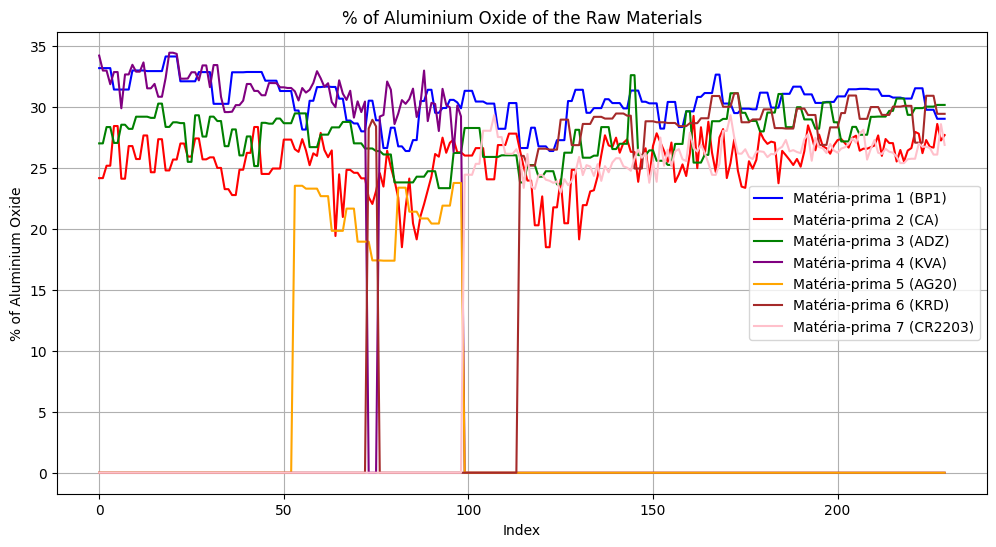

In [123]:
columns = [
    "Al2O3.0",
    "Al2O3.1",
    "Al2O3.2",
    "Al2O3.3",
    "Al2O3.4",
    "Al2O3.5",
    "Al2O3.6"
    
]



legend_labels = [
    "Matéria-prima 1 (BP1)",
    "Matéria-prima 2 (CA)",
    "Matéria-prima 3 (ADZ)",
    "Matéria-prima 4 (KVA)",
    "Matéria-prima 5 (AG20)",
    "Matéria-prima 6 (KRD)",
    "Matéria-prima 7 (CR2203)"   
]

for col in columns:
    data[col] = pd.to_numeric(data[col], errors="coerce")


colors = ["blue", "red", "green", "purple", "orange", "brown", "pink"]

plt.figure(figsize=(12, 6))


for i, col in enumerate(columns):
    plt.plot(data.index, data[col], linestyle='-', color=colors[i], label=legend_labels[i])

plt.xlabel("Index")
plt.ylabel("% of Aluminium Oxide")
plt.title("% of Aluminium Oxide of the Raw Materials")
plt.legend()
plt.grid(True)

plt.show()

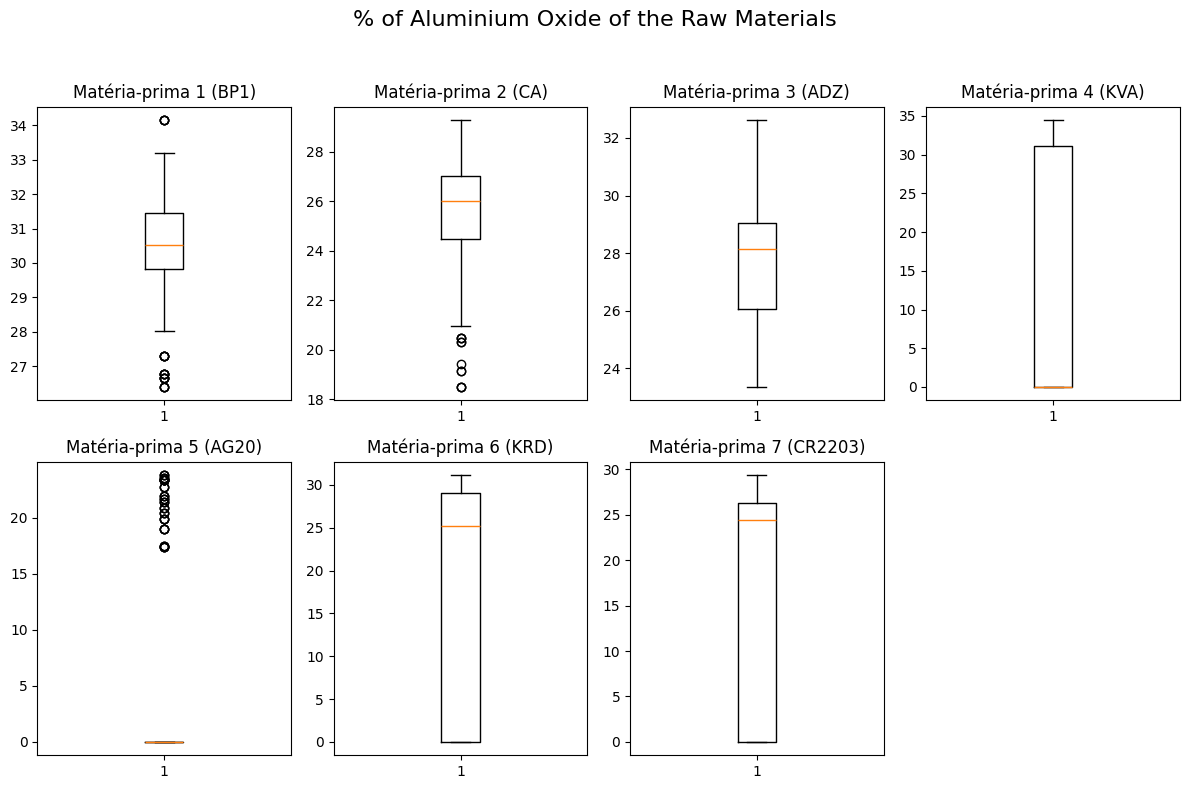

In [124]:
fig, axs = plt.subplots(2, 4, figsize=(12, 8))

for i, col in enumerate(columns):
    row = i // 4
    col_index = i % 4
    axs[row, col_index].boxplot(data[col].dropna())
    axs[row, col_index].set_title(legend_labels[i])

fig.delaxes(axs[1, 3])

plt.suptitle("% of Aluminium Oxide of the Raw Materials", fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.95]) 
plt.show()


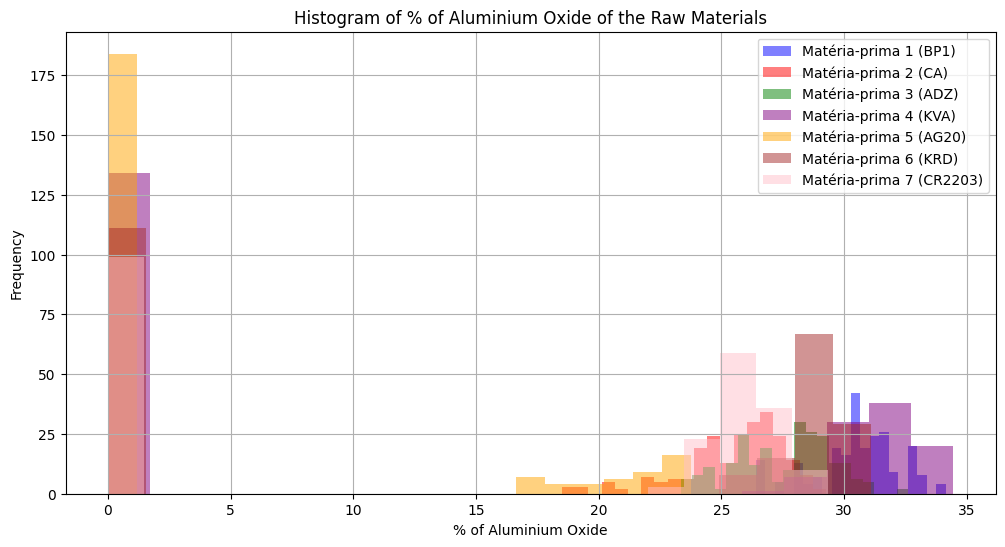


statistics:
              mean        std        min        max      range          cv
Al2O3.0  30.519007   1.711677  26.395477  34.152534   7.757057    5.608560
Al2O3.1  25.494111   2.099789  18.503185  29.274142  10.770957    8.236368
Al2O3.2  27.592513   1.973978  23.347503  32.618464   9.270961    7.154036
Al2O3.3  13.097541  15.537978   0.000000  34.460549  34.460549  118.632792
Al2O3.4   4.214914   8.501536   0.000000  23.775042  23.775042  201.701310
Al2O3.5  14.871643  14.431801   0.000000  31.121845  31.121845   97.042414
Al2O3.6  14.801735  12.930965   0.000000  29.349167  29.349167   87.361145


In [125]:
plt.figure(figsize=(12, 6))
for i, col in enumerate(columns):
    plt.hist(data[col].dropna(), bins=20, alpha=0.5, color=colors[i], label=legend_labels[i])
plt.xlabel("% of Aluminium Oxide")
plt.ylabel("Frequency")
plt.title("Histogram of % of Aluminium Oxide of the Raw Materials")
plt.legend()
plt.grid(True)
plt.show()


statistics = data[columns].describe().T[['mean', 'std', 'min', 'max']]
statistics['range'] = statistics['max'] - statistics['min']
statistics['cv'] = statistics['std'] / statistics['mean'] * 100
print("\nstatistics:")
print(statistics)

In [126]:

zero_counts = (data[columns] == 0).sum()
print("\nNumber of zero values in each column:")
print(zero_counts)



Number of zero values in each column:
Al2O3.0      0
Al2O3.1      0
Al2O3.2      0
Al2O3.3    134
Al2O3.4    184
Al2O3.5    111
Al2O3.6     99
dtype: int64


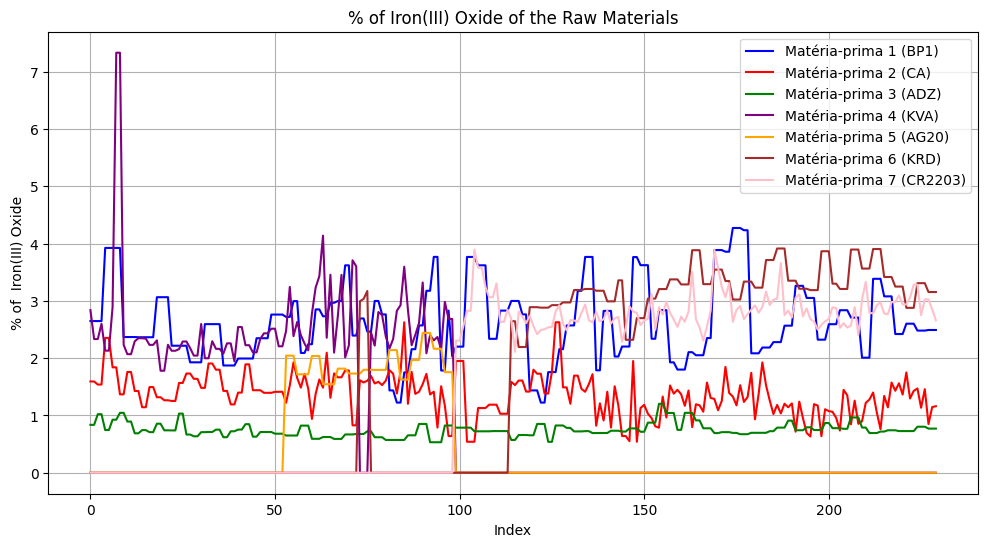

In [127]:
columns = [
    "Fe2O3.0",
    "Fe2O3.1",
    "Fe2O3.2",
    "Fe2O3.3",
    "Fe2O3.4",
    "Fe2O3.5",
    "Fe2O3.6"
    
]

for col in columns:
    data[col] = pd.to_numeric(data[col], errors="coerce")

plt.figure(figsize=(12, 6))

for i, col in enumerate(columns):
    plt.plot(data.index, data[col], linestyle='-', color=colors[i], label=legend_labels[i])

plt.xlabel("Index")
plt.ylabel("% of  Iron(III) Oxide")
plt.title("% of Iron(III) Oxide of the Raw Materials")
plt.legend()
plt.grid(True)

plt.show()

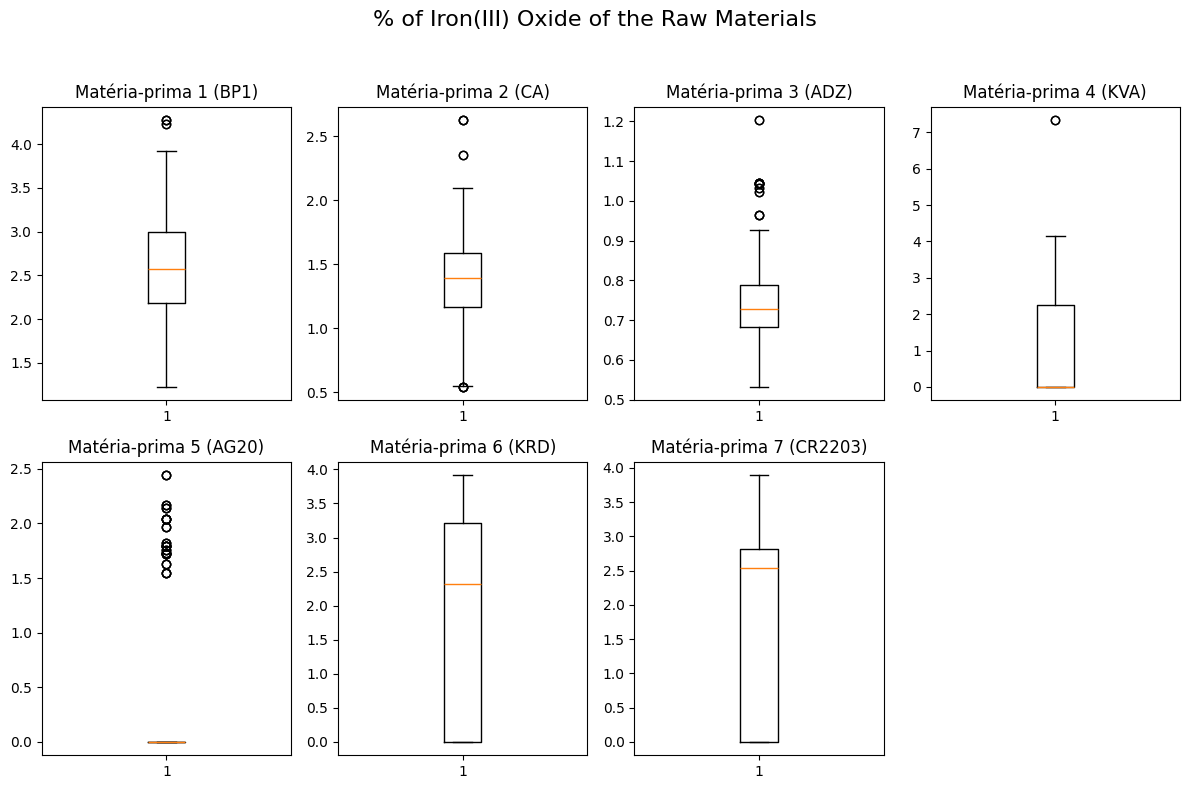

In [128]:
fig, axs = plt.subplots(2, 4, figsize=(12, 8))

for i, col in enumerate(columns):
    row = i // 4
    col_index = i % 4
    axs[row, col_index].boxplot(data[col].dropna())
    axs[row, col_index].set_title(legend_labels[i])

fig.delaxes(axs[1, 3])

plt.suptitle("% of Iron(III) Oxide of the Raw Materials", fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.95]) 
plt.show()


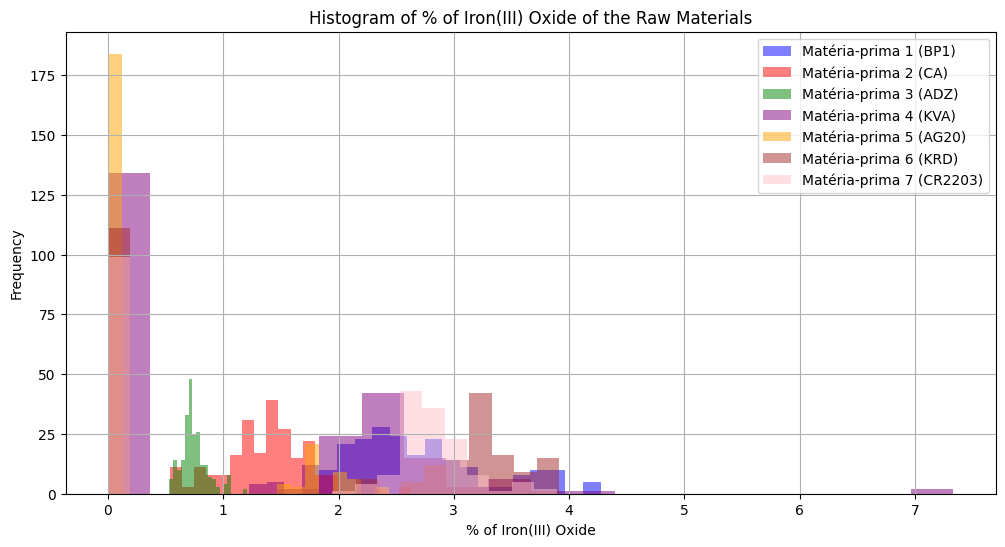


statistics:
             mean       std       min       max     range          cv
Fe2O3.0  2.626159  0.664616  1.224375  4.272979  3.048604   25.307516
Fe2O3.1  1.370403  0.374562  0.540364  2.627094  2.086730   27.332235
Fe2O3.2  0.748905  0.118354  0.532223  1.202744  0.670521   15.803655
Fe2O3.3  1.069197  1.373960  0.000000  7.333009  7.333009  128.503940
Fe2O3.4  0.376256  0.761388  0.000000  2.441014  2.441014  202.358849
Fe2O3.5  1.669744  1.639811  0.000000  3.914782  3.914782   98.207312
Fe2O3.6  1.607876  1.419546  0.000000  3.893576  3.893576   88.286997


In [129]:
plt.figure(figsize=(12, 6))
for i, col in enumerate(columns):
    plt.hist(data[col].dropna(), bins=20, alpha=0.5, color=colors[i], label=legend_labels[i])
plt.xlabel("% of Iron(III) Oxide")
plt.ylabel("Frequency")
plt.title("Histogram of % of Iron(III) Oxide of the Raw Materials")
plt.legend()
plt.grid(True)
plt.show()


statistics = data[columns].describe().T[['mean', 'std', 'min', 'max']]
statistics['range'] = statistics['max'] - statistics['min']
statistics['cv'] = statistics['std'] / statistics['mean'] * 100
print("\nstatistics:")
print(statistics)

In [130]:
zero_counts = (data[columns] == 0).sum()
print("\nNumber of zero values in each column:")
print(zero_counts)



Number of zero values in each column:
Fe2O3.0      0
Fe2O3.1      0
Fe2O3.2      0
Fe2O3.3    134
Fe2O3.4    184
Fe2O3.5    111
Fe2O3.6     99
dtype: int64


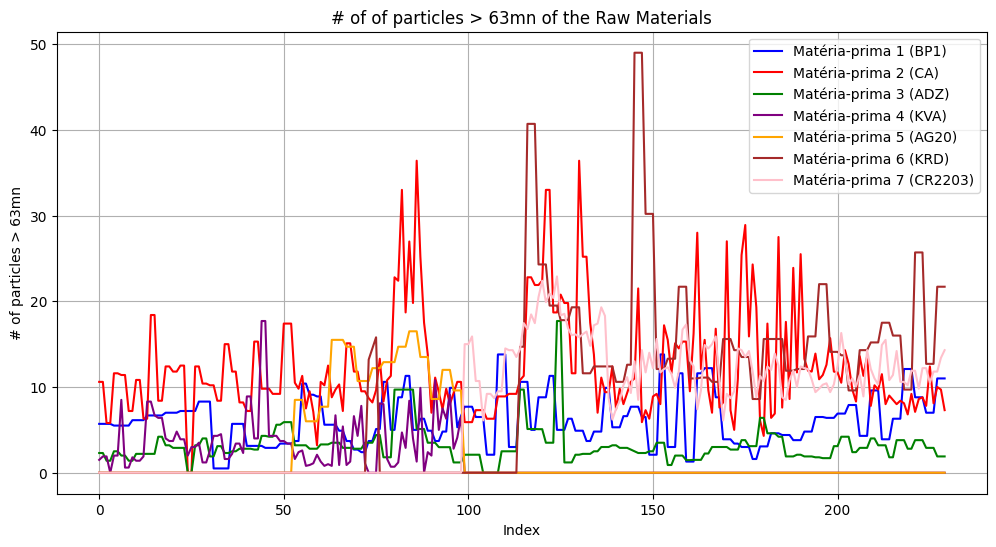

In [131]:
columns = [
    ">63mm.0",
    ">63mm.1",
    ">63mm.2",
    ">63mm.3",
    ">63mm.4",
    ">63mm.5",
    ">63mm.6"
]

for col in columns:
    data[col] = pd.to_numeric(data[col], errors="coerce")

plt.figure(figsize=(12, 6))

for i, col in enumerate(columns):
    plt.plot(data.index, data[col],  linestyle='-', color=colors[i], label=legend_labels[i])

plt.xlabel("Index")
plt.ylabel("# of particles > 63mn")
plt.title("# of of particles > 63mn of the Raw Materials")
plt.legend()
plt.grid(True)

plt.show()

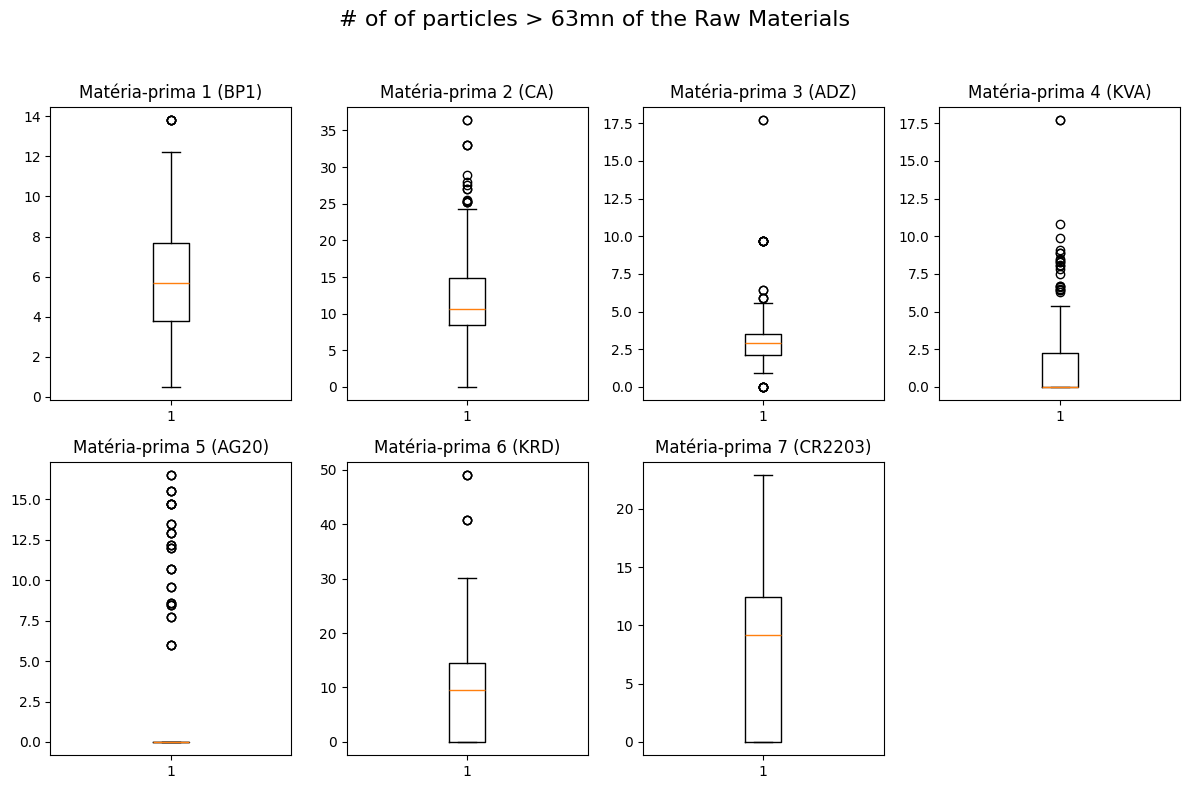

In [132]:
fig, axs = plt.subplots(2, 4, figsize=(12, 8))

for i, col in enumerate(columns):
    row = i // 4
    col_index = i % 4
    axs[row, col_index].boxplot(data[col].dropna())
    axs[row, col_index].set_title(legend_labels[i])

fig.delaxes(axs[1, 3])

plt.suptitle("# of of particles > 63mn of the Raw Materials", fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.95]) 
plt.show()

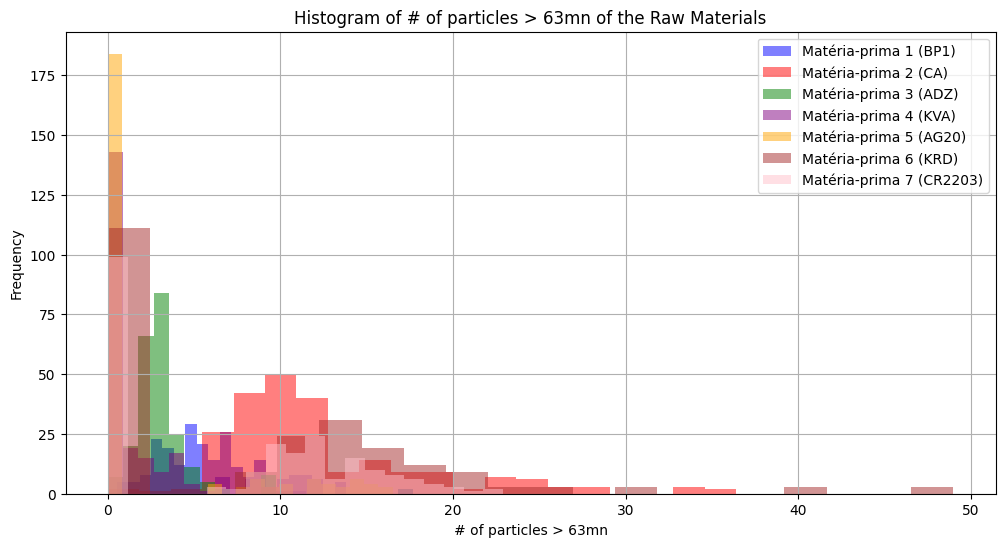


statistics:
              mean        std  min   max  range          cv
>63mm.0   6.117739   2.988625  0.5  13.8   13.3   48.851789
>63mm.1  12.362457   6.221158  0.0  36.4   36.4   50.322995
>63mm.2   3.210435   2.180898  0.0  17.7   17.7   67.931546
>63mm.3   1.636522   2.869120  0.0  17.7   17.7  175.318157
>63mm.4   2.323478   4.864304  0.0  16.5   16.5  209.354409
>63mm.5   8.690435  10.207891  0.0  49.0   49.0  117.461226
>63mm.6   7.289565   6.857434  0.0  22.9   22.9   94.071915


In [133]:
plt.figure(figsize=(12, 6))
for i, col in enumerate(columns):
    plt.hist(data[col].dropna(), bins=20, alpha=0.5, color=colors[i], label=legend_labels[i])
plt.xlabel("# of particles > 63mn")
plt.ylabel("Frequency")
plt.title("Histogram of # of particles > 63mn of the Raw Materials")
plt.legend()
plt.grid(True)
plt.show()


statistics = data[columns].describe().T[['mean', 'std', 'min', 'max']]
statistics['range'] = statistics['max'] - statistics['min']
statistics['cv'] = statistics['std'] / statistics['mean'] * 100
print("\nstatistics:")
print(statistics)

In [134]:
zero_counts = (data[columns] == 0).sum()
print("\nNumber of zero values in each column:")
print(zero_counts)


Number of zero values in each column:
>63mm.0      0
>63mm.1      2
>63mm.2      7
>63mm.3    136
>63mm.4    184
>63mm.5    111
>63mm.6     99
dtype: int64


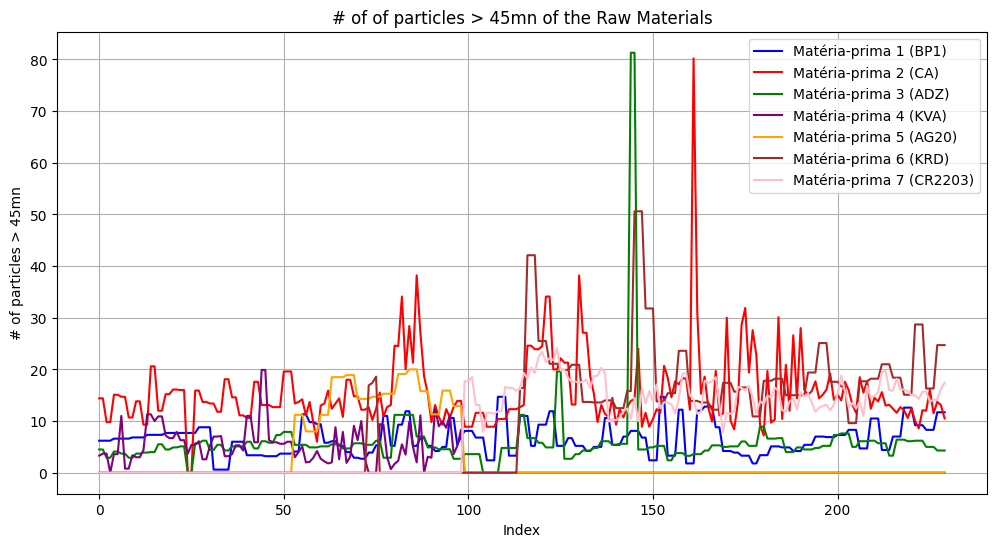

In [135]:
columns = [
    ">45mm.0",
    ">45mm.1",
    ">45mm.2",
    ">45mm.3",
    ">45mm.4",
    ">45mm.5",
    ">45mm.6"
]

for col in columns:
    data[col] = pd.to_numeric(data[col], errors="coerce")

plt.figure(figsize=(12, 6))

for i, col in enumerate(columns):
    plt.plot(data.index, data[col],  linestyle='-', color=colors[i], label=legend_labels[i])


plt.xlabel("Index")
plt.ylabel("# of particles > 45mn")
plt.title("# of of particles > 45mn of the Raw Materials")
plt.legend()
plt.grid(True)

plt.show()

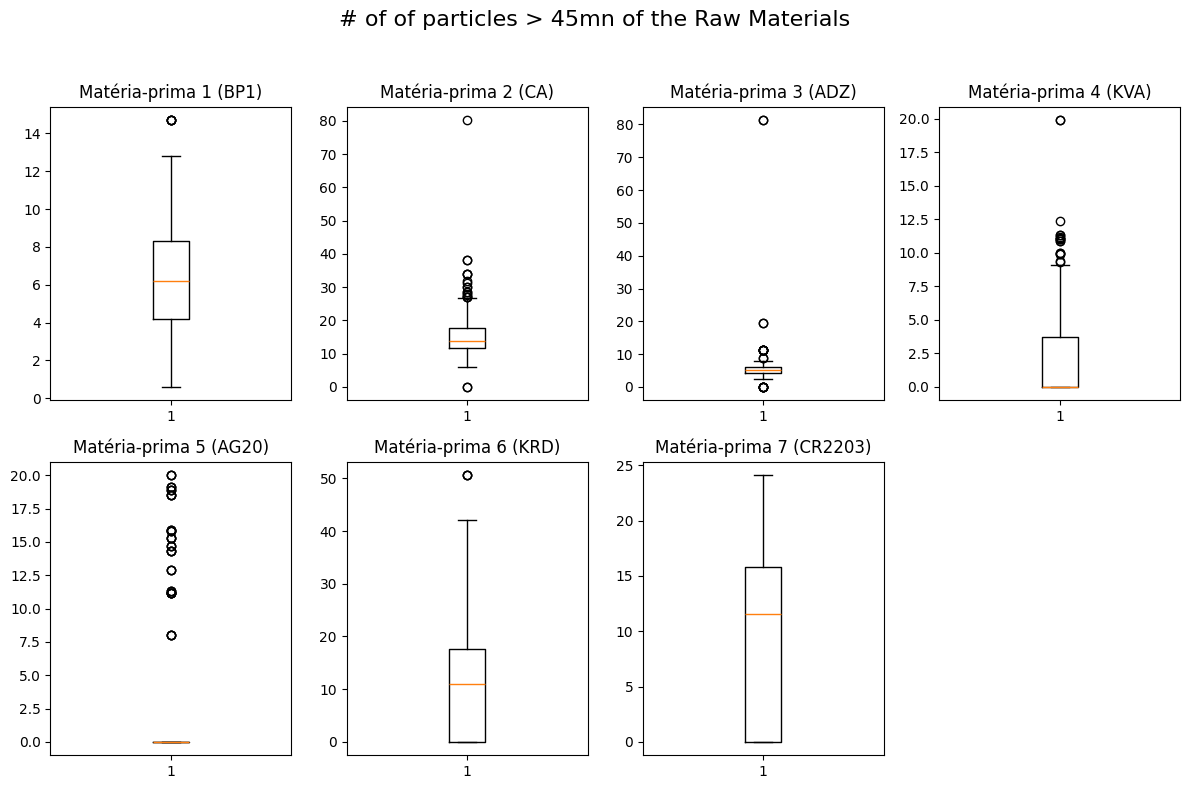

In [136]:
fig, axs = plt.subplots(2, 4, figsize=(12, 8))

for i, col in enumerate(columns):
    row = i // 4
    col_index = i % 4
    axs[row, col_index].boxplot(data[col].dropna())
    axs[row, col_index].set_title(legend_labels[i])

fig.delaxes(axs[1, 3])

plt.suptitle("# of of particles > 45mn of the Raw Materials", fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.95]) 
plt.show()

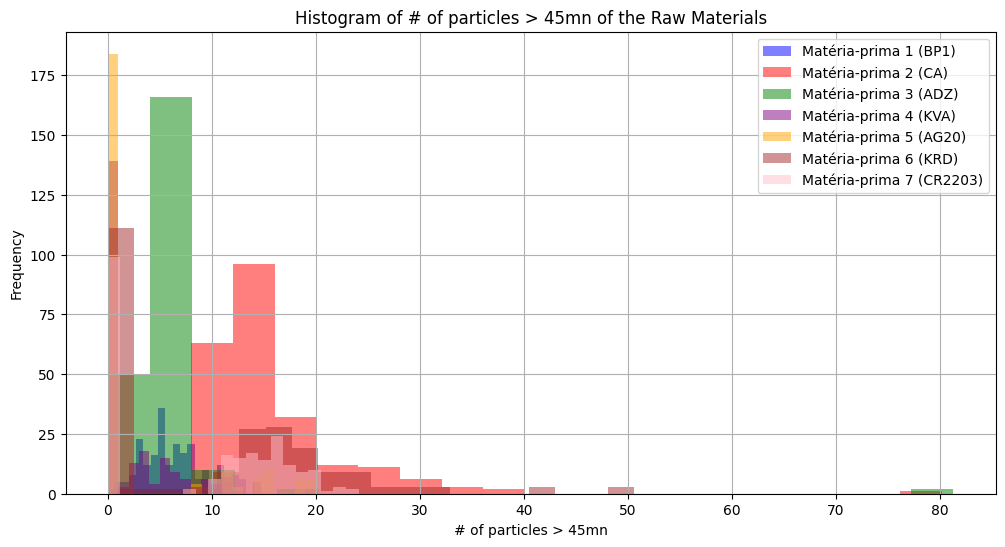


statistics:
              mean        std  min   max  range          cv
>45mm.0   6.569435   3.111798  0.6  14.7   14.1   47.367825
>45mm.1  15.518522   7.336396  0.0  80.2   80.2   47.275097
>45mm.2   5.906609   7.440710  0.0  81.3   81.3  125.972620
>45mm.3   2.407391   3.722220  0.0  19.9   19.9  154.616335
>45mm.4   2.945217   6.107069  0.0  20.0   20.0  207.355445
>45mm.5   9.932609  11.158408  0.0  50.6   50.6  112.341161
>45mm.6   8.684261   7.937237  0.0  24.1   24.1   91.397962


In [137]:
plt.figure(figsize=(12, 6))
for i, col in enumerate(columns):
    plt.hist(data[col].dropna(), bins=20, alpha=0.5, color=colors[i], label=legend_labels[i])
plt.xlabel("# of particles > 45mn")
plt.ylabel("Frequency")
plt.title("Histogram of # of particles > 45mn of the Raw Materials")
plt.legend()
plt.grid(True)
plt.show()


statistics = data[columns].describe().T[['mean', 'std', 'min', 'max']]
statistics['range'] = statistics['max'] - statistics['min']
statistics['cv'] = statistics['std'] / statistics['mean'] * 100
print("\nstatistics:")
print(statistics)

In [138]:
zero_counts = (data[columns] == 0).sum()
print("\nNumber of zero values in each column:")
print(zero_counts)



Number of zero values in each column:
>45mm.0      0
>45mm.1      2
>45mm.2      7
>45mm.3    136
>45mm.4    184
>45mm.5    111
>45mm.6     99
dtype: int64


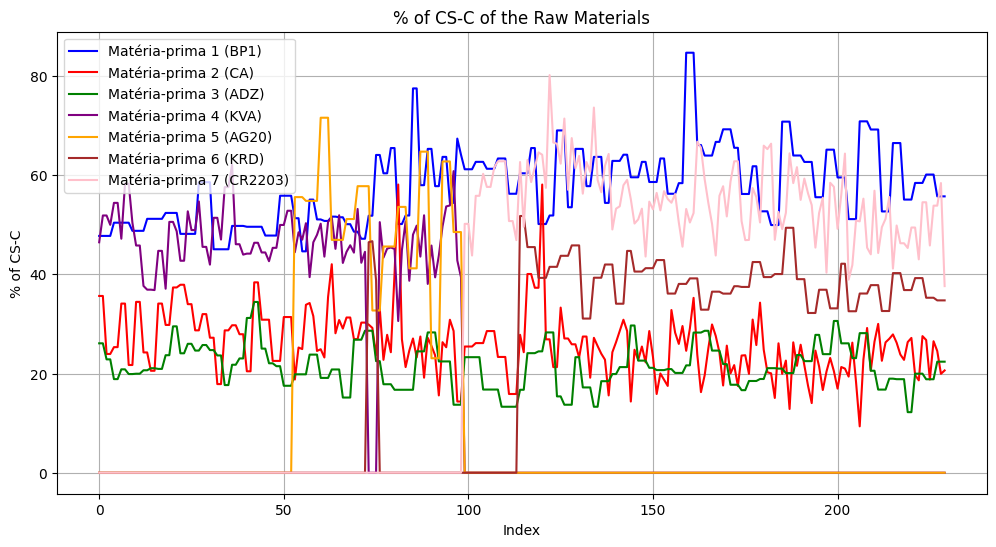

In [139]:
columns = [
    "CS-C.0",
    "CS-C.1",
    "CS-C.2",
    "CS-C.3",
    "CS-C.4",
    "CS-C.5",
    "CS-C.6"
]

for col in columns:
    data[col] = pd.to_numeric(data[col], errors="coerce")

plt.figure(figsize=(12, 6))

for i, col in enumerate(columns):
    plt.plot(data.index, data[col], linestyle='-', color=colors[i], label=legend_labels[i])

plt.xlabel("Index")
plt.ylabel("% of CS-C")
plt.title("% of CS-C of the Raw Materials")
plt.legend()
plt.grid(True)

plt.show()

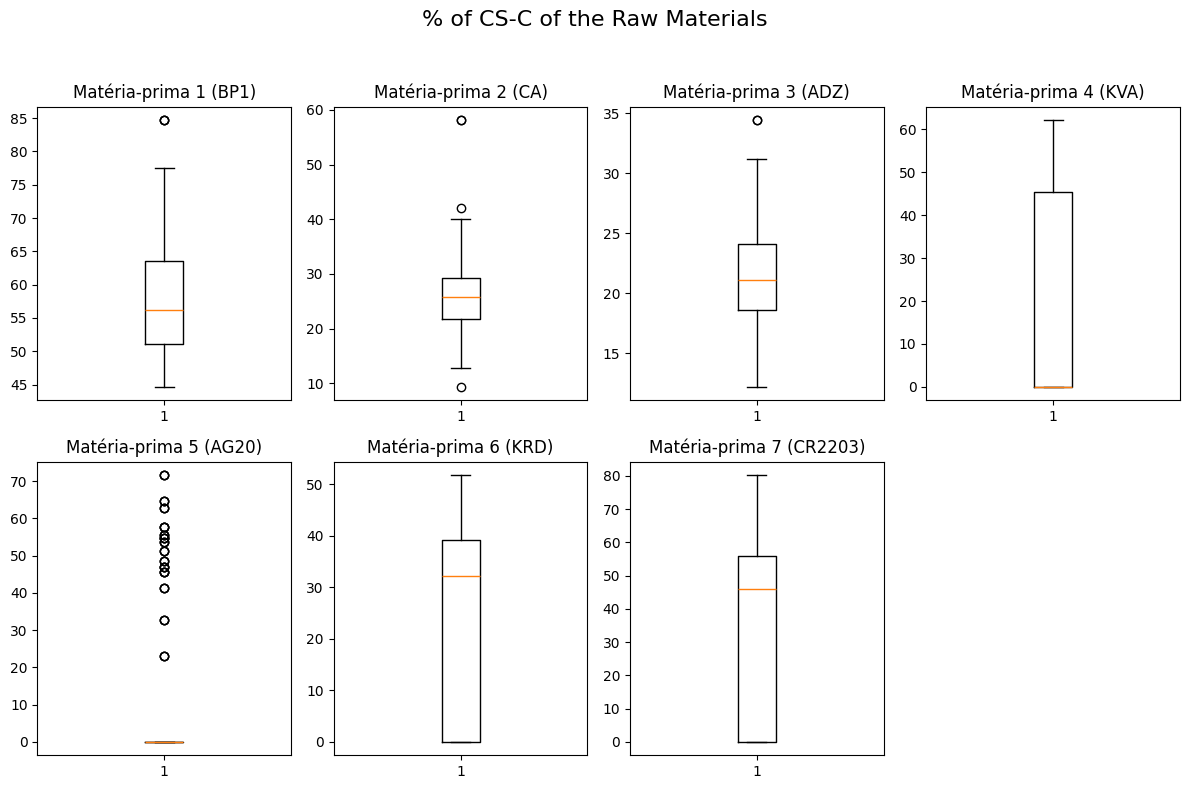

In [140]:
fig, axs = plt.subplots(2, 4, figsize=(12, 8))

for i, col in enumerate(columns):
    row = i // 4
    col_index = i % 4
    axs[row, col_index].boxplot(data[col].dropna())
    axs[row, col_index].set_title(legend_labels[i])

fig.delaxes(axs[1, 3])

plt.suptitle("% of CS-C of the Raw Materials", fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.95]) 
plt.show()

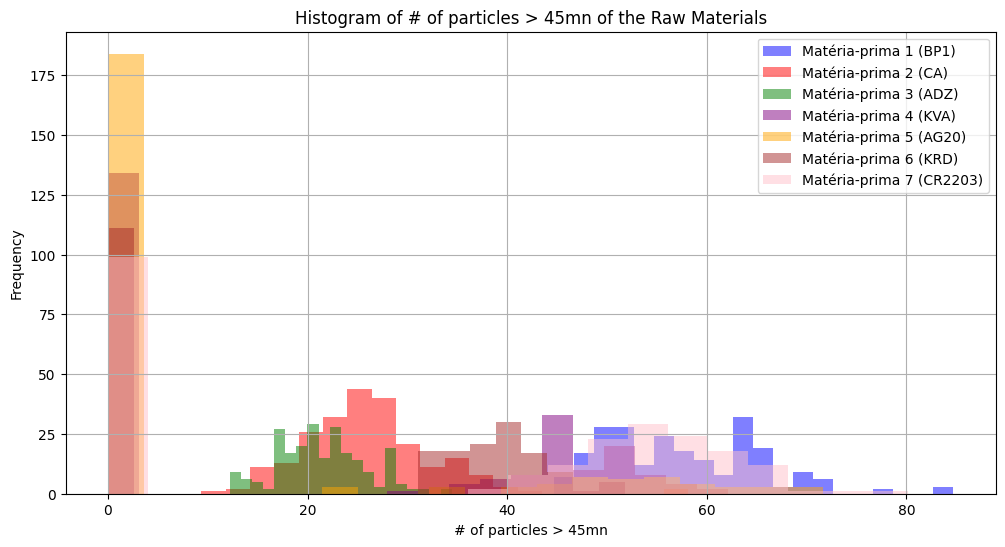


statistics:
             mean        std        min        max      range          cv
CS-C.0  57.656661   7.760067  44.646730  84.697732  40.051002   13.459100
CS-C.1  26.103246   6.573141   9.351205  58.118738  48.767533   25.181317
CS-C.2  21.539839   4.393091  12.211645  34.436012  22.224367   20.395189
CS-C.3  19.674616  23.573399   0.000000  62.086017  62.086017  119.816311
CS-C.4  10.155245  21.030779   0.000000  71.588928  71.588928  207.092787
CS-C.5  20.128238  19.753692   0.000000  51.771700  51.771700   98.139201
CS-C.6  31.391392  27.914585   0.000000  80.186353  80.186353   88.924330


In [141]:
plt.figure(figsize=(12, 6))
for i, col in enumerate(columns):
    plt.hist(data[col].dropna(), bins=20, alpha=0.5, color=colors[i], label=legend_labels[i])
plt.xlabel("# of particles > 45mn")
plt.ylabel("Frequency")
plt.title("Histogram of # of particles > 45mn of the Raw Materials")
plt.legend()
plt.grid(True)
plt.show()


statistics = data[columns].describe().T[['mean', 'std', 'min', 'max']]
statistics['range'] = statistics['max'] - statistics['min']
statistics['cv'] = statistics['std'] / statistics['mean'] * 100
print("\nstatistics:")
print(statistics)

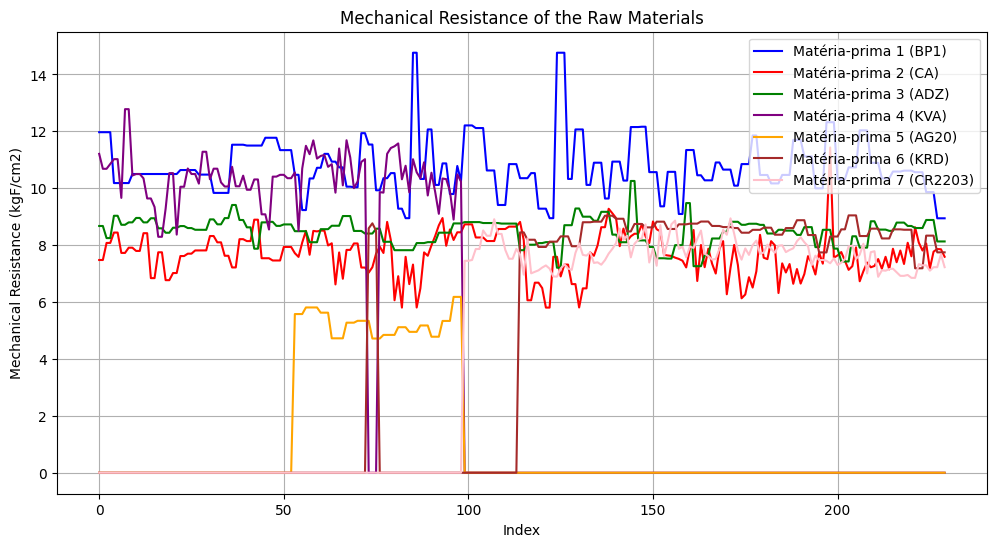

In [142]:
columns = [
    "RMS.0",
    "RMS.1",
    "RMS.2",
    "RMS.3",
    "RMS.4",
    "RMS.5",
    "RMS.6"
]

for col in columns:
    data[col] = pd.to_numeric(data[col], errors="coerce")

markers = ["o", "s", "D", "^", "v", "*", "x"]
colors = ["blue", "red", "green", "purple", "orange", "brown", "pink"]

plt.figure(figsize=(12, 6))

for i, col in enumerate(columns):
    plt.plot(data.index, data[col], linestyle='-', color=colors[i], label=legend_labels[i])

plt.xlabel("Index")
plt.ylabel("Mechanical Resistance (kgF/cm2)")
plt.title("Mechanical Resistance of the Raw Materials")
plt.legend()
plt.grid(True)

plt.show()

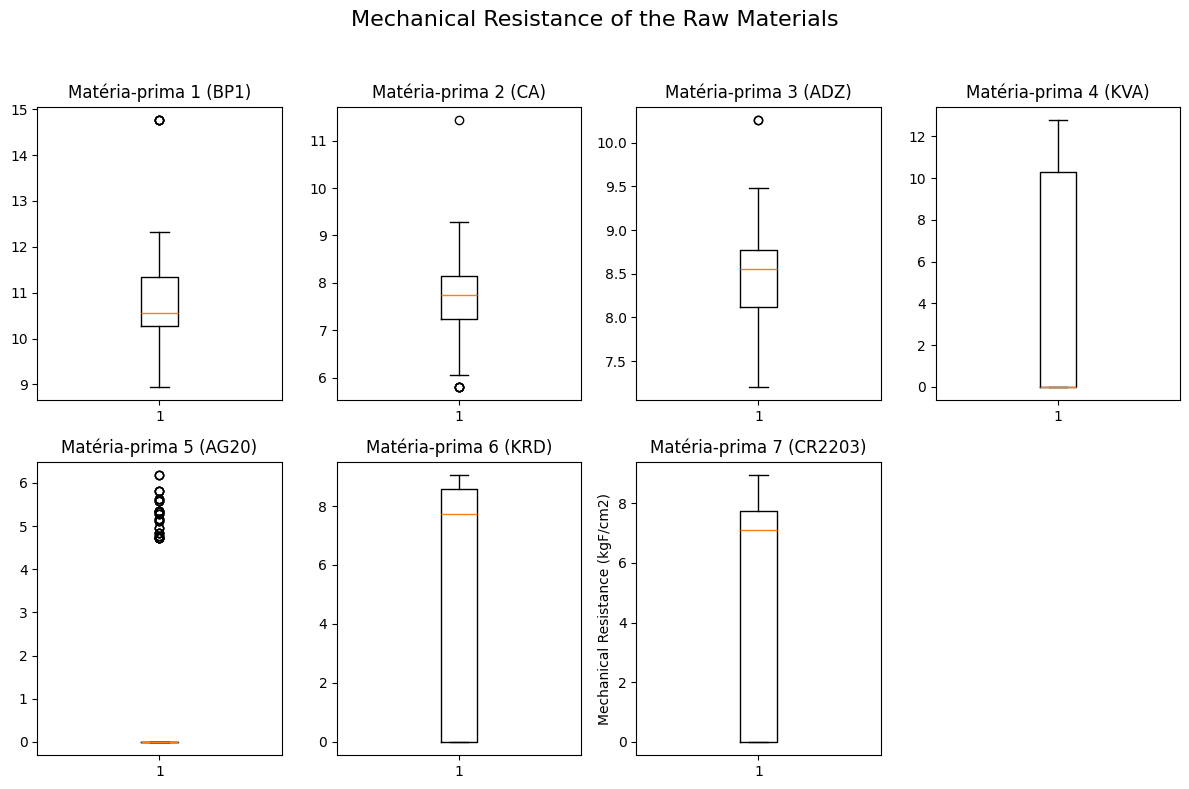

In [143]:
fig, axs = plt.subplots(2, 4, figsize=(12, 8))

for i, col in enumerate(columns):
    row = i // 4
    col_index = i % 4
    axs[row, col_index].boxplot(data[col].dropna())
    axs[row, col_index].set_title(legend_labels[i])

fig.delaxes(axs[1, 3])

plt.ylabel("Mechanical Resistance (kgF/cm2)")
plt.suptitle("Mechanical Resistance of the Raw Materials", fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.95]) 
plt.show()

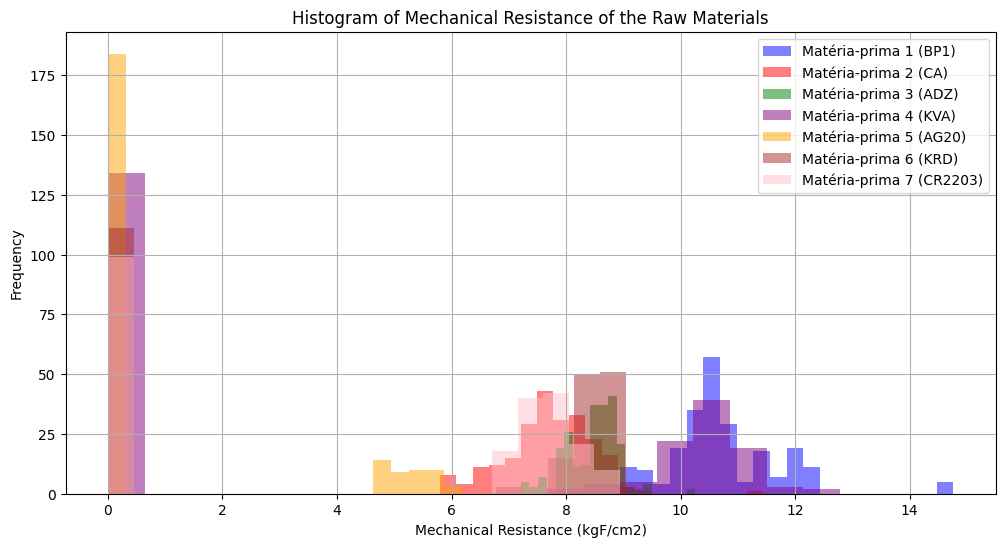


statistics:
            mean       std       min        max      range          cv
RMS.0  10.764330  1.007419  8.943260  14.763430   5.820170    9.358863
RMS.1   7.696537  0.755589  5.804632  11.433213   5.628581    9.817259
RMS.2   8.477673  0.478193  7.205862  10.255675   3.049813    5.640621
RMS.3   4.339049  5.164971  0.000000  12.779867  12.779867  119.034628
RMS.4   1.048150  2.109439  0.000000   6.180503   6.180503  201.253552
RMS.5   4.385404  4.253268  0.000000   9.045657   9.045657   96.986905
RMS.6   4.384248  3.837697  0.000000   8.941636   8.941636   87.533769


In [144]:
plt.figure(figsize=(12, 6))
for i, col in enumerate(columns):
    plt.hist(data[col].dropna(), bins=20, alpha=0.5, color=colors[i], label=legend_labels[i])
plt.xlabel("Mechanical Resistance (kgF/cm2)")
plt.ylabel("Frequency")
plt.title("Histogram of Mechanical Resistance of the Raw Materials")
plt.legend()
plt.grid(True)
plt.show()


statistics = data[columns].describe().T[['mean', 'std', 'min', 'max']]
statistics['range'] = statistics['max'] - statistics['min']
statistics['cv'] = statistics['std'] / statistics['mean'] * 100
print("\nstatistics:")
print(statistics)

In [145]:
zero_counts = (data[columns] == 0).sum()
print("\nNumber of zero values in each column:")    
print(zero_counts)


Number of zero values in each column:
RMS.0      0
RMS.1      0
RMS.2      0
RMS.3    134
RMS.4    184
RMS.5    111
RMS.6     99
dtype: int64


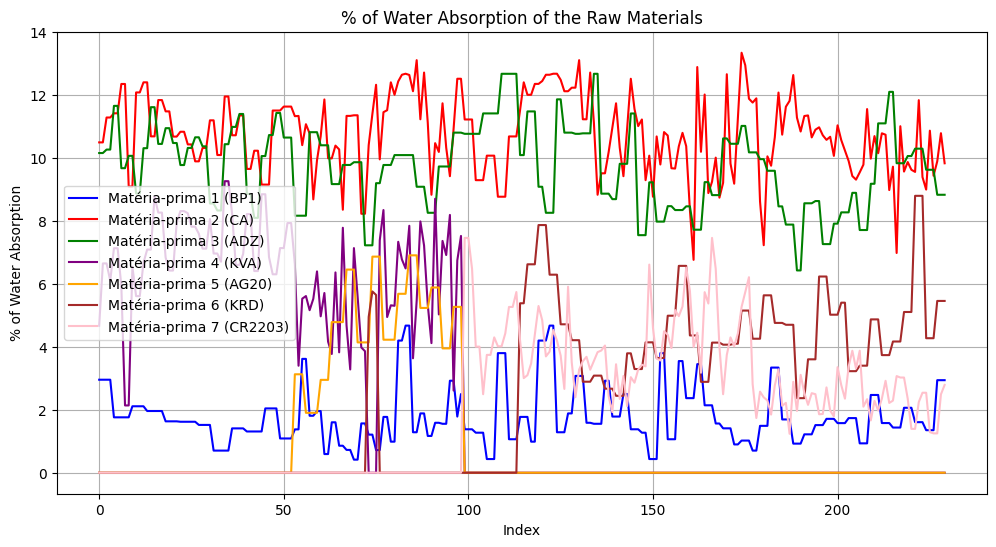

In [146]:
columns = [
    "A.A..0",
    "A.A..1",
    "A.A..2",
    "A.A..3",
    "A.A..4",
    "A.A..5",
    "A.A..6"
]

for col in columns:
    data[col] = pd.to_numeric(data[col], errors="coerce")

plt.figure(figsize=(12, 6))

for i, col in enumerate(columns):
    plt.plot(data.index, data[col],  linestyle='-', color=colors[i], label=legend_labels[i])


plt.xlabel("Index")
plt.ylabel("% of Water Absorption")
plt.title("% of Water Absorption of the Raw Materials")
plt.legend()
plt.grid(True)

plt.show()

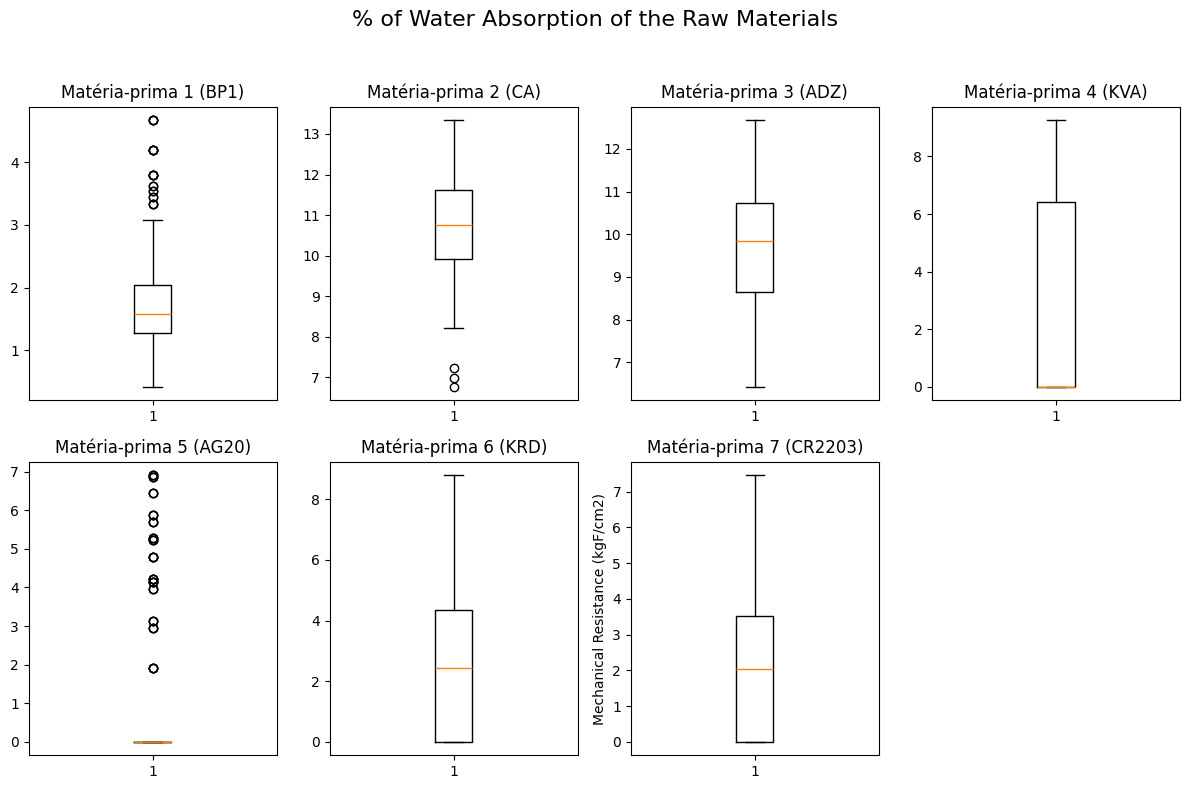

In [147]:
fig, axs = plt.subplots(2, 4, figsize=(12, 8))

for i, col in enumerate(columns):
    row = i // 4
    col_index = i % 4
    axs[row, col_index].boxplot(data[col].dropna())
    axs[row, col_index].set_title(legend_labels[i])

fig.delaxes(axs[1, 3])

plt.ylabel("Mechanical Resistance (kgF/cm2)")
plt.suptitle("% of Water Absorption of the Raw Materials", fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.95]) 
plt.show()

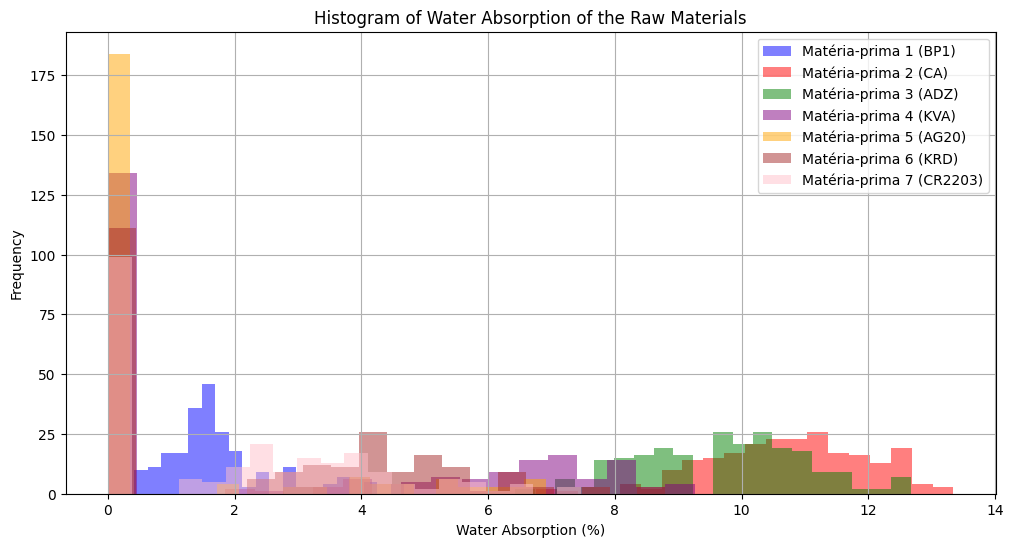


statistics:
             mean       std       min        max     range          cv
A.A..0   1.789510  0.916405  0.415191   4.672651  4.257460   51.209803
A.A..1  10.757222  1.234410  6.761373  13.340319  6.578945   11.475174
A.A..2   9.727114  1.318722  6.425399  12.670923  6.245523   13.557173
A.A..3   2.714774  3.374805  0.000000   9.259829  9.259829  124.312526
A.A..4   0.944123  2.002848  0.000000   6.904995  6.904995  212.138355
A.A..5   2.367644  2.503073  0.000000   8.794915  8.794915  105.719997
A.A..6   1.992248  2.030244  0.000000   7.458765  7.458765  101.907192


In [148]:
plt.figure(figsize=(12, 6))
for i, col in enumerate(columns):
    plt.hist(data[col].dropna(), bins=20, alpha=0.5, color=colors[i], label=legend_labels[i])
plt.xlabel("Water Absorption (%)")
plt.ylabel("Frequency")
plt.title("Histogram of Water Absorption of the Raw Materials")
plt.legend()
plt.grid(True)
plt.show()


statistics = data[columns].describe().T[['mean', 'std', 'min', 'max']]
statistics['range'] = statistics['max'] - statistics['min']
statistics['cv'] = statistics['std'] / statistics['mean'] * 100
print("\nstatistics:")
print(statistics)

In [149]:
zero_counts = (data[columns] == 0).sum()
print("\nNumber of zero values in each column:")
print(zero_counts)


Number of zero values in each column:
A.A..0      0
A.A..1      0
A.A..2      0
A.A..3    134
A.A..4    184
A.A..5    111
A.A..6     99
dtype: int64


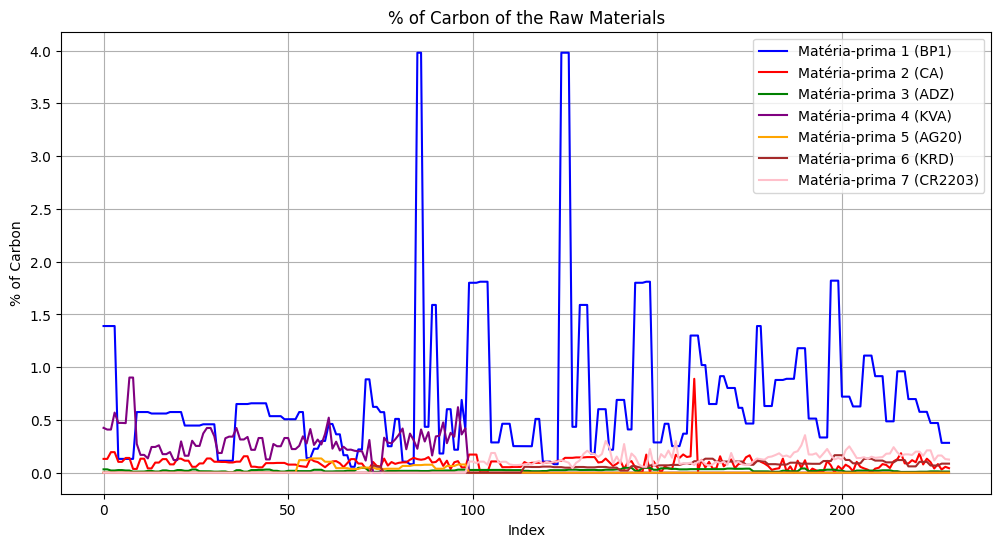

In [150]:
columns = [
    "Carbono.0",
    "Carbono.1",
    "Carbono.2",
    "Carbono.3",
    "Carbono.4",
    "Carbono.5",
    "Carbono.6"
]

for col in columns:
    data[col] = pd.to_numeric(data[col], errors="coerce")

plt.figure(figsize=(12, 6))


for i, col in enumerate(columns):
    plt.plot(data.index, data[col],  linestyle='-', color=colors[i], label=legend_labels[i])

plt.xlabel("Index")
plt.ylabel("% of Carbon")
plt.title("% of Carbon of the Raw Materials")
plt.legend()
plt.grid(True)

plt.show()

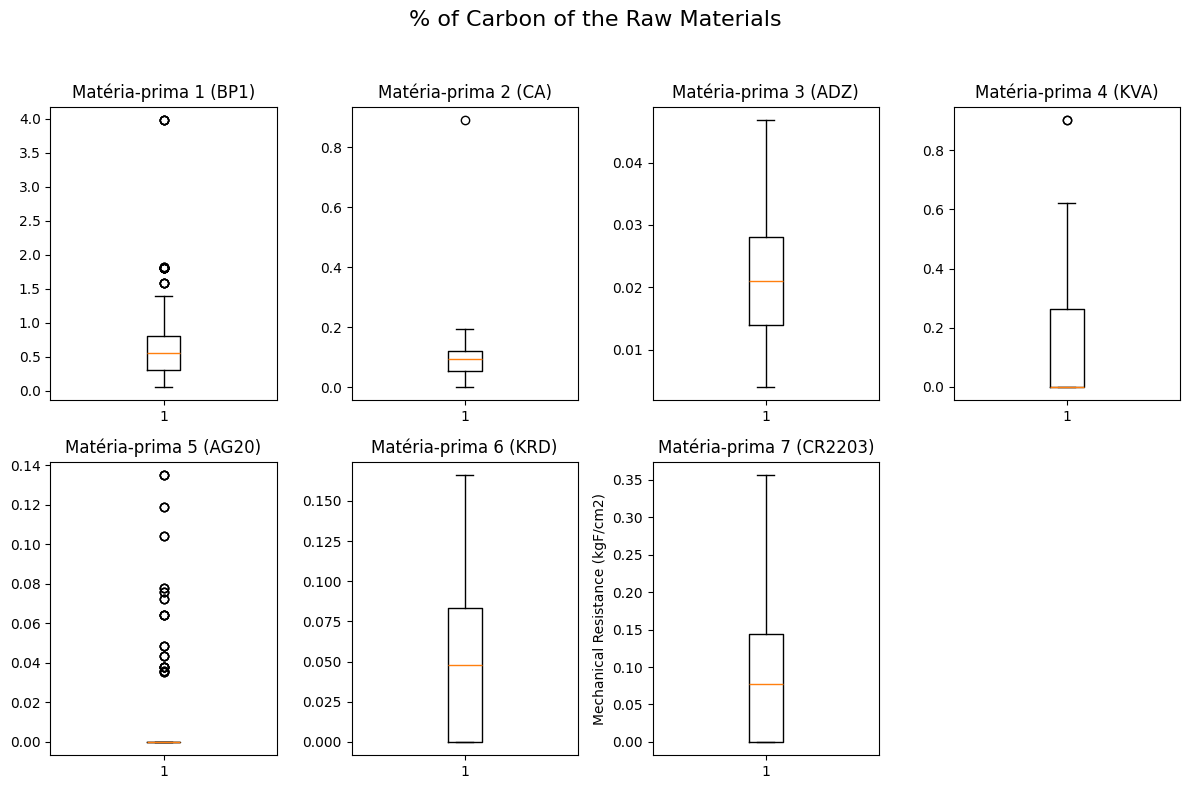

In [151]:
fig, axs = plt.subplots(2, 4, figsize=(12, 8))

for i, col in enumerate(columns):
    row = i // 4
    col_index = i % 4
    axs[row, col_index].boxplot(data[col].dropna())
    axs[row, col_index].set_title(legend_labels[i])

fig.delaxes(axs[1, 3])

plt.ylabel("Mechanical Resistance (kgF/cm2)")
plt.suptitle("% of Carbon of the Raw Materials", fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.95]) 
plt.show()

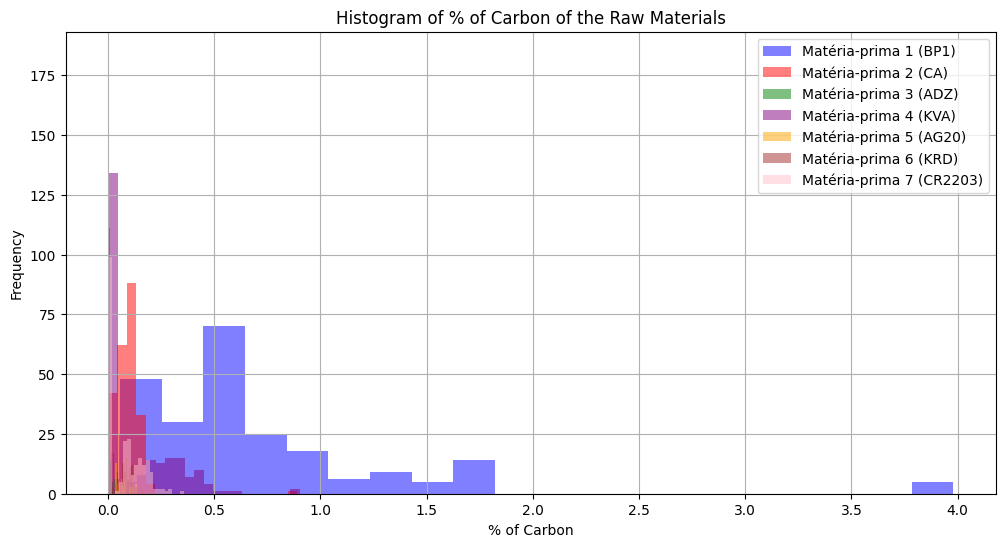


statistics:
               mean       std       min     max     range          cv
Carbono.0  0.707921  0.662165  0.056200  3.9800  3.923800   93.536646
Carbono.1  0.092630  0.068465  0.000206  0.8900  0.889794   73.912192
Carbono.2  0.021934  0.009839  0.004000  0.0468  0.042800   44.857985
Carbono.3  0.129322  0.175945  0.000000  0.9020  0.902000  136.052039
Carbono.4  0.013564  0.030716  0.000000  0.1350  0.135000  226.448804
Carbono.5  0.042952  0.046676  0.000000  0.1660  0.166000  108.669384
Carbono.6  0.079599  0.081575  0.000000  0.3560  0.356000  102.482464


In [152]:
plt.figure(figsize=(12, 6))
for i, col in enumerate(columns):
    plt.hist(data[col].dropna(), bins=20, alpha=0.5, color=colors[i], label=legend_labels[i])
plt.xlabel("% of Carbon")
plt.ylabel("Frequency")
plt.title("Histogram of % of Carbon of the Raw Materials")
plt.legend()
plt.grid(True)
plt.show()


statistics = data[columns].describe().T[['mean', 'std', 'min', 'max']]
statistics['range'] = statistics['max'] - statistics['min']
statistics['cv'] = statistics['std'] / statistics['mean'] * 100
print("\nstatistics:")
print(statistics)

In [153]:
zero_counts = (data[columns] == 0).sum()
print("\nNumber of zero values in each column:")
print(zero_counts)


Number of zero values in each column:
Carbono.0      0
Carbono.1      0
Carbono.2      0
Carbono.3    134
Carbono.4    184
Carbono.5    111
Carbono.6     99
dtype: int64


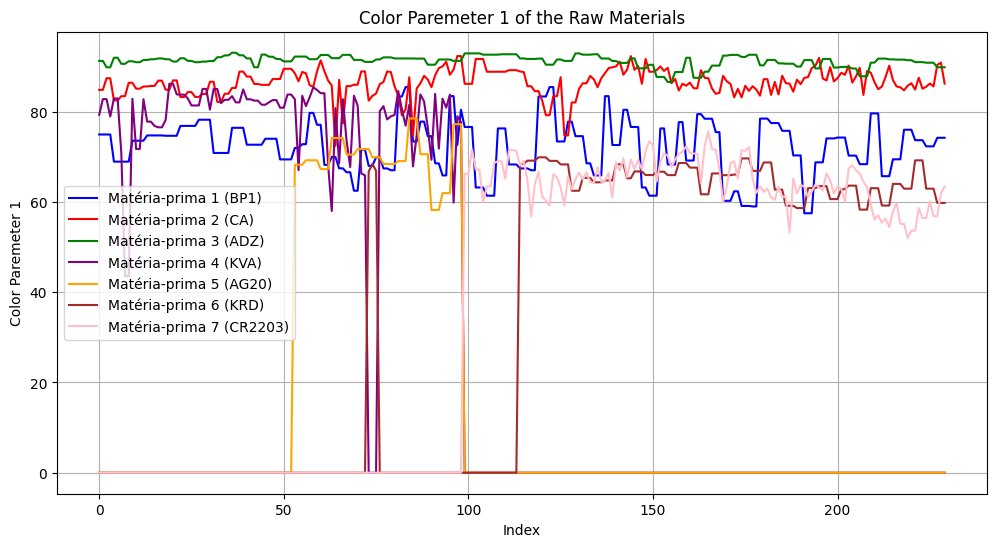

In [154]:
columns = [
    "L.0",
    "L.1",
    "L.2",
    "L.3",
    "L.4",
    "L.5",
    "L.6"
]



for col in columns:
    data[col] = pd.to_numeric(data[col], errors="coerce")
plt.figure(figsize=(12, 6))

for i, col in enumerate(columns):
    plt.plot(data.index, data[col],  linestyle='-', color=colors[i], label=legend_labels[i])

plt.xlabel("Index")
plt.ylabel("Color Paremeter 1")
plt.title("Color Paremeter 1 of the Raw Materials")
plt.legend()
plt.grid(True)

plt.show()

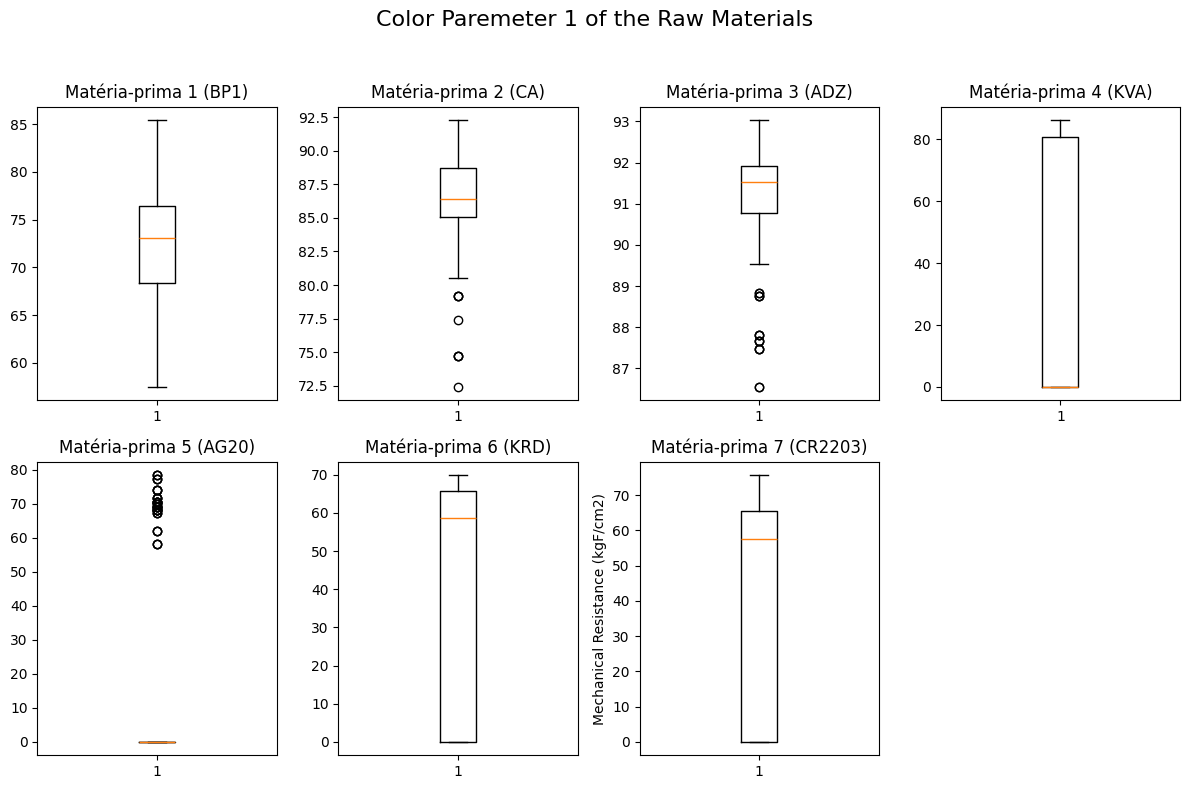

In [155]:

fig, axs = plt.subplots(2, 4, figsize=(12, 8))

for i, col in enumerate(columns):
    row = i // 4
    col_index = i % 4
    axs[row, col_index].boxplot(data[col].dropna())
    axs[row, col_index].set_title(legend_labels[i])

fig.delaxes(axs[1, 3])

plt.ylabel("Mechanical Resistance (kgF/cm2)")
plt.suptitle("Color Paremeter 1 of the Raw Materials", fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.95]) 
plt.show()

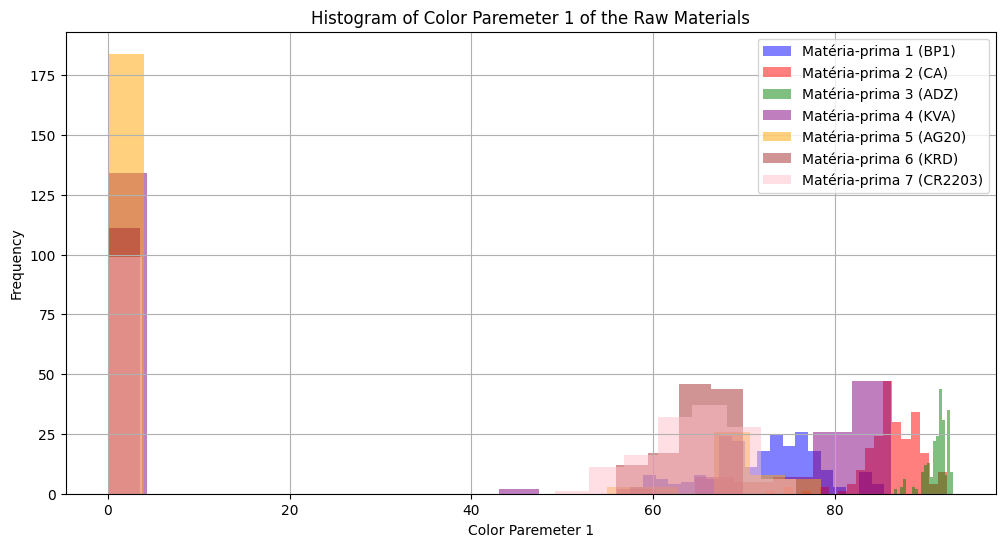


statistics:
          mean        std    min    max  range          cv
L.0  72.163493   6.034784  57.47  85.42  27.95    8.362656
L.1  86.417312   3.021424  72.40  92.29  19.89    3.496318
L.2  91.209884   1.263497  86.55  93.03   6.48    1.385263
L.3  32.902109  39.277500   0.00  86.15  86.15  119.376846
L.4  13.944652  28.036725   0.00  78.47  78.47  201.057183
L.5  33.583337  32.591794   0.00  69.86  69.86   97.047516
L.6  36.761710  32.256048   0.00  75.66  75.66   87.743600


In [156]:
plt.figure(figsize=(12, 6))
for i, col in enumerate(columns):
    plt.hist(data[col].dropna(), bins=20, alpha=0.5, color=colors[i], label=legend_labels[i])
plt.xlabel("Color Paremeter 1")
plt.ylabel("Frequency")
plt.title("Histogram of Color Paremeter 1 of the Raw Materials")
plt.legend()
plt.grid(True)
plt.show()


statistics = data[columns].describe().T[['mean', 'std', 'min', 'max']]
statistics['range'] = statistics['max'] - statistics['min']
statistics['cv'] = statistics['std'] / statistics['mean'] * 100
print("\nstatistics:")
print(statistics)

In [157]:
zero_counts = (data[columns] == 0).sum()
print("\nNumber of zero values in each column:")
print(zero_counts)


Number of zero values in each column:
L.0      0
L.1      0
L.2      0
L.3    134
L.4    184
L.5    111
L.6     99
dtype: int64


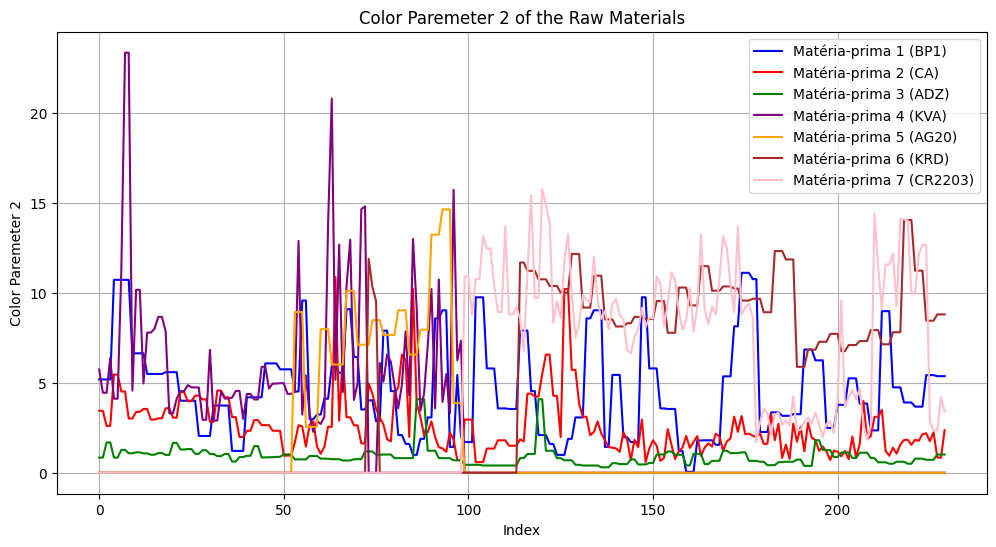

In [158]:
columns = [
    "a.0",
    "a.1",
    "a.2",
    "a.3",
    "a.4",
    "a.5",
    "a.6"
]

for col in columns:
    data[col] = pd.to_numeric(data[col], errors="coerce")

plt.figure(figsize=(12, 6))

for i, col in enumerate(columns):
    plt.plot(data.index, data[col],  linestyle='-', color=colors[i], label=legend_labels[i])

plt.xlabel("Index")
plt.ylabel("Color Paremeter 2")
plt.title("Color Paremeter 2 of the Raw Materials")
plt.legend()
plt.grid(True)

plt.show()

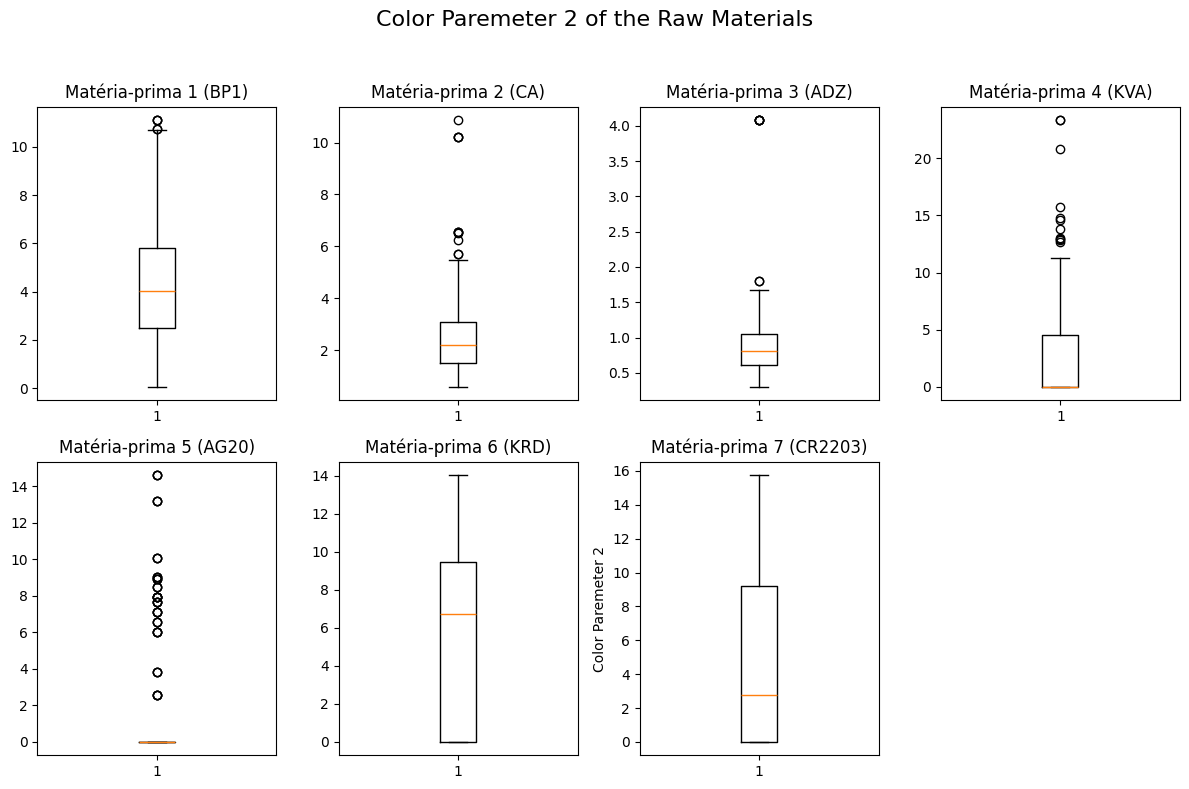

In [159]:

fig, axs = plt.subplots(2, 4, figsize=(12, 8))

for i, col in enumerate(columns):
    row = i // 4
    col_index = i % 4
    axs[row, col_index].boxplot(data[col].dropna())
    axs[row, col_index].set_title(legend_labels[i])

fig.delaxes(axs[1, 3])

plt.ylabel("Color Paremeter 2")
plt.suptitle("Color Paremeter 2 of the Raw Materials", fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.95]) 
plt.show()

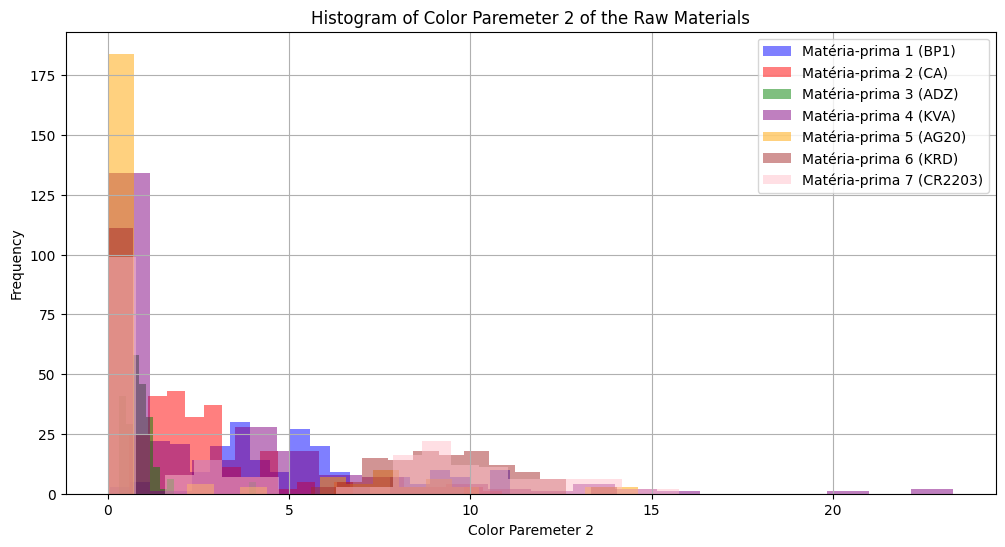


statistics:
         mean       std   min    max  range          cv
a.0  4.642754  2.648610  0.05  11.10  11.05   57.048267
a.1  2.602091  1.651178  0.59  10.86  10.27   63.455831
a.2  0.907051  0.564531  0.30   4.08   3.78   62.238108
a.3  2.719565  4.214939  0.00  23.32  23.32  154.985777
a.4  1.588348  3.465109  0.00  14.62  14.62  218.158059
a.5  4.853326  4.872429  0.00  14.03  14.03  100.393614
a.6  4.704246  4.962130  0.00  15.75  15.75  105.481936


In [160]:
plt.figure(figsize=(12, 6))
for i, col in enumerate(columns):
    plt.hist(data[col].dropna(), bins=20, alpha=0.5, color=colors[i], label=legend_labels[i])
plt.xlabel("Color Paremeter 2")
plt.ylabel("Frequency")
plt.title("Histogram of Color Paremeter 2 of the Raw Materials")
plt.legend()
plt.grid(True)
plt.show()


statistics = data[columns].describe().T[['mean', 'std', 'min', 'max']]
statistics['range'] = statistics['max'] - statistics['min']
statistics['cv'] = statistics['std'] / statistics['mean'] * 100
print("\nstatistics:")
print(statistics)

In [161]:
zero_counts = (data[columns] == 0).sum()
print("\nNumber of zero values in each column:")
print(zero_counts)


Number of zero values in each column:
a.0      0
a.1      0
a.2      0
a.3    134
a.4    184
a.5    111
a.6     99
dtype: int64


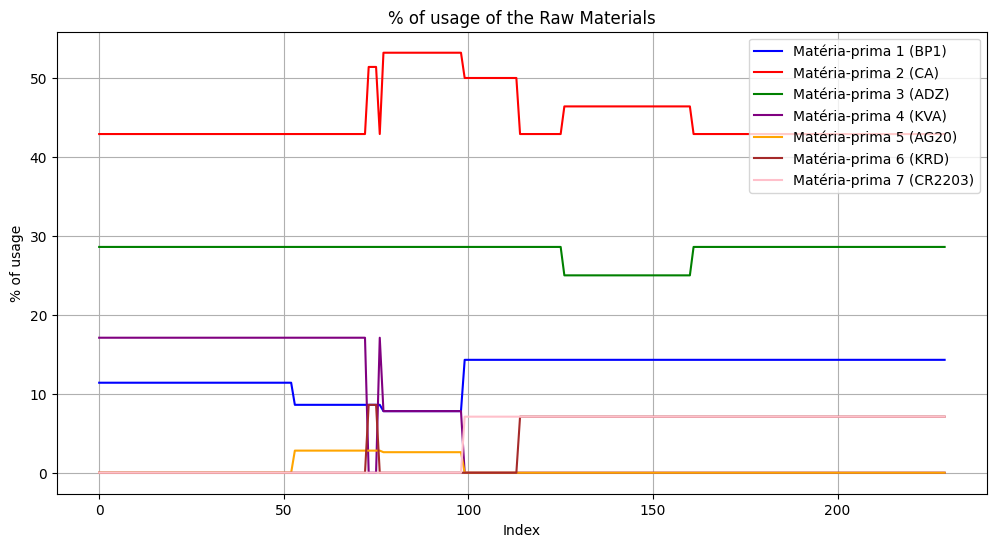

In [162]:
columns = [
    "%.0",
    "%.1",
    "%.2",
    "%.3",
    "%.4",
    "%.5",
    "%.6"
]

for col in columns:
    data[col] = pd.to_numeric(data[col], errors="coerce")

plt.figure(figsize=(12, 6))

for i, col in enumerate(columns):
    plt.plot(data.index, data[col],  linestyle='-', color=colors[i], label=legend_labels[i])

plt.xlabel("Index")
plt.ylabel("% of usage")
plt.title("% of usage of the Raw Materials")
plt.legend()
plt.grid(True)

plt.show()

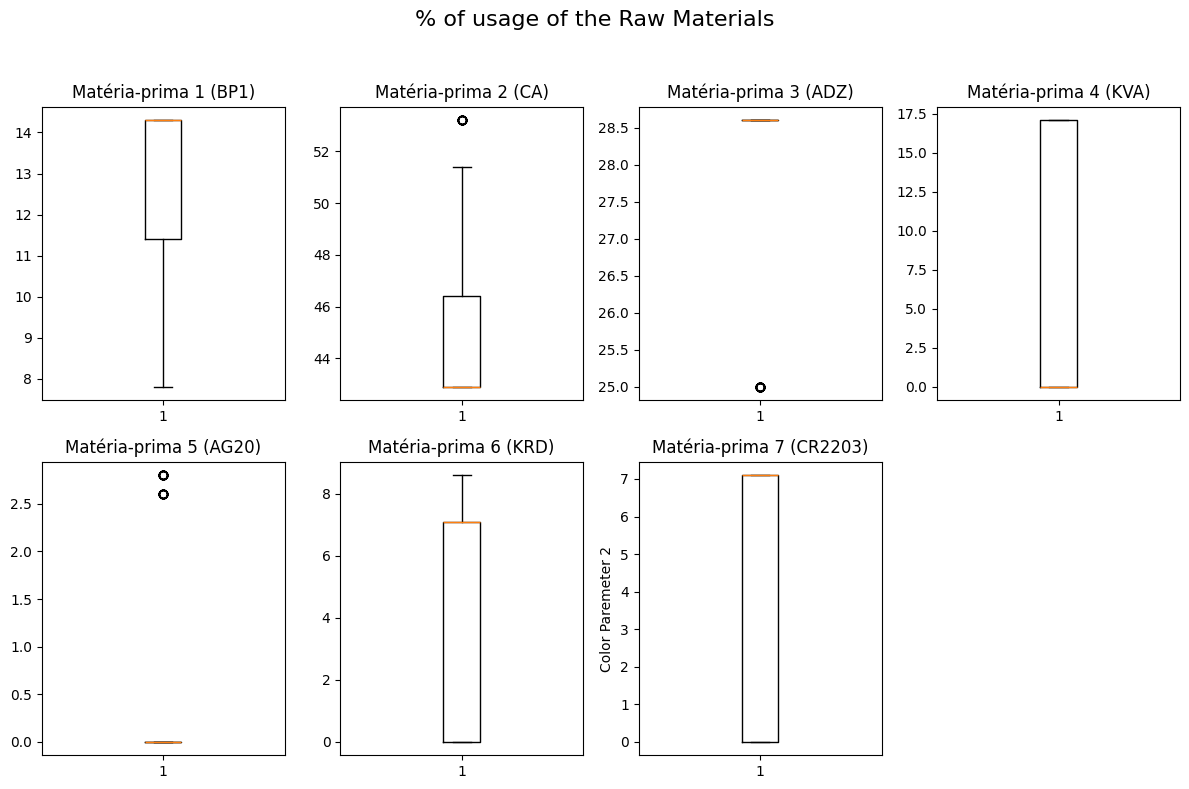

In [163]:

fig, axs = plt.subplots(2, 4, figsize=(12, 8))

for i, col in enumerate(columns):
    row = i // 4
    col_index = i % 4
    axs[row, col_index].boxplot(data[col].dropna())
    axs[row, col_index].set_title(legend_labels[i])

fig.delaxes(axs[1, 3])

plt.ylabel("Color Paremeter 2")
plt.suptitle("% of usage of the Raw Materials", fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.95]) 
plt.show()

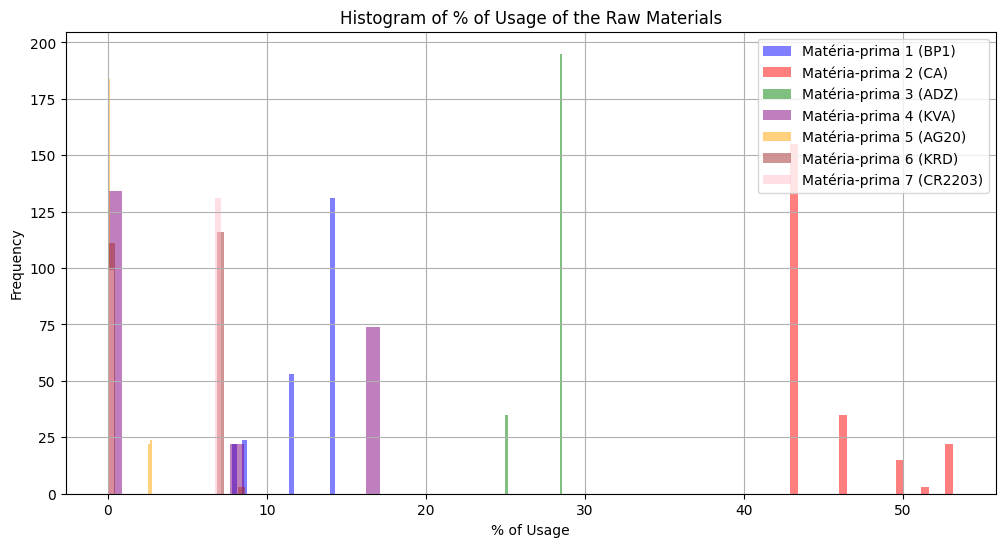


statistics:
          mean       std   min   max  range          cv
%.0  12.415217  2.417130   7.8  14.3    6.5   19.469093
%.1  44.991739  3.452291  42.9  53.2   10.3    7.673167
%.2  28.052174  1.295902  25.0  28.6    3.6    4.619614
%.3   6.247826  7.818546   0.0  17.1   17.1  125.140269
%.4   0.540870  1.085023   0.0   2.8    2.8  200.607099
%.5   3.693043  3.578544   0.0   8.6    8.6   96.899592
%.6   4.043913  3.523140   0.0   7.1    7.1   87.122058


In [164]:
plt.figure(figsize=(12, 6))
for i, col in enumerate(columns):
    plt.hist(data[col].dropna(), bins=20, alpha=0.5, color=colors[i], label=legend_labels[i])
plt.xlabel("% of Usage")
plt.ylabel("Frequency")
plt.title("Histogram of % of Usage of the Raw Materials")
plt.legend()
plt.grid(True)
plt.show()


statistics = data[columns].describe().T[['mean', 'std', 'min', 'max']]
statistics['range'] = statistics['max'] - statistics['min']
statistics['cv'] = statistics['std'] / statistics['mean'] * 100
print("\nstatistics:")
print(statistics)

In [165]:
zero_counts = (data[columns] == 0).sum()
print("\nNumber of zero values in each column:")
print(zero_counts)


Number of zero values in each column:
%.0      0
%.1      0
%.2      0
%.3    134
%.4    184
%.5    111
%.6     99
dtype: int64


In [166]:
actual_zeros = set()
total_zeros = 0
for i in range(len(data)):
    for j in range(len(mapping)-1):
        for k in range(7):
            if data.iloc[i, j+11*k] == 0 and data.iloc[i, 10+ 11*k] != 0:
                print(f"Row {i} has a zero in {mapping[j]}.{k} but not in %")
                actual_zeros.add((i, j+11*k))

print(f"\nTotal number of actual zeros: {len(actual_zeros)}")

for col in data.columns:
    total_zeros = total_zeros + (data[col] == 0).sum()

print(f"Total number of zeros in the dataset: {total_zeros}")
    


Row 3 has a zero in >63mm.3 but not in %
Row 3 has a zero in >45mm.3 but not in %
Row 24 has a zero in >63mm.1 but not in %
Row 24 has a zero in >63mm.2 but not in %
Row 24 has a zero in >45mm.1 but not in %
Row 24 has a zero in >45mm.2 but not in %
Row 25 has a zero in >63mm.1 but not in %
Row 25 has a zero in >63mm.2 but not in %
Row 25 has a zero in >45mm.1 but not in %
Row 25 has a zero in >45mm.2 but not in %
Row 88 has a zero in >63mm.3 but not in %
Row 88 has a zero in >45mm.3 but not in %
Row 104 has a zero in >63mm.2 but not in %
Row 104 has a zero in >45mm.2 but not in %
Row 105 has a zero in >63mm.2 but not in %
Row 105 has a zero in >45mm.2 but not in %
Row 106 has a zero in >63mm.2 but not in %
Row 106 has a zero in >45mm.2 but not in %
Row 107 has a zero in >63mm.2 but not in %
Row 107 has a zero in >45mm.2 but not in %
Row 108 has a zero in >63mm.2 but not in %
Row 108 has a zero in >45mm.2 but not in %

Total number of actual zeros: 22
Total number of zeros in the datas

In [167]:

for col in data.columns:
    if col not in actual_zeros:
        data[col] = data[col].replace(0, 1e-3)


for i, j in actual_zeros:
    data.iloc[i, j] = 0



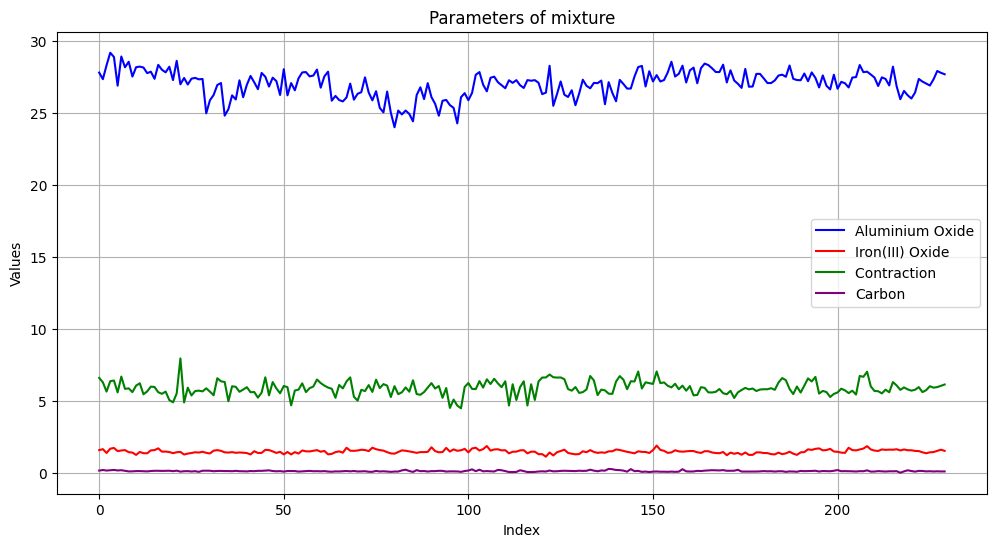

In [168]:
columns = [
    "Al2O3.7",
    "Fe2O3.7",
    "CS-C.7",
    "Carbono.7",
]

legend_labels = ["Aluminium Oxide", "Iron(III) Oxide", "Contraction ", "Carbon"]

for col in columns:
    data[col] = pd.to_numeric(data[col], errors="coerce")

plt.figure(figsize=(12, 6))

for i, col in enumerate(columns):
    plt.plot(data.index, data[col], linestyle='-', color=colors[i], label=legend_labels[i])

plt.xlabel("Index")
plt.ylabel("Values")
plt.title("Parameters of mixture")
plt.legend()
plt.grid(True)

plt.show()

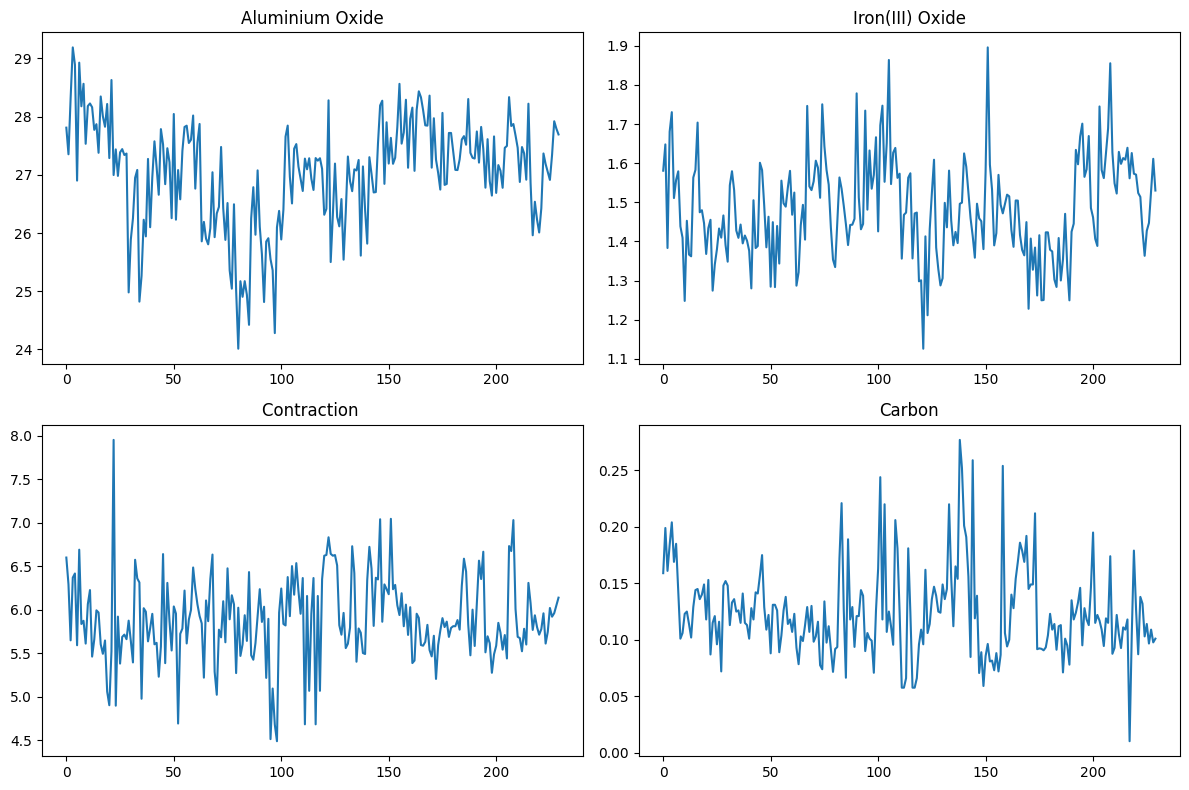

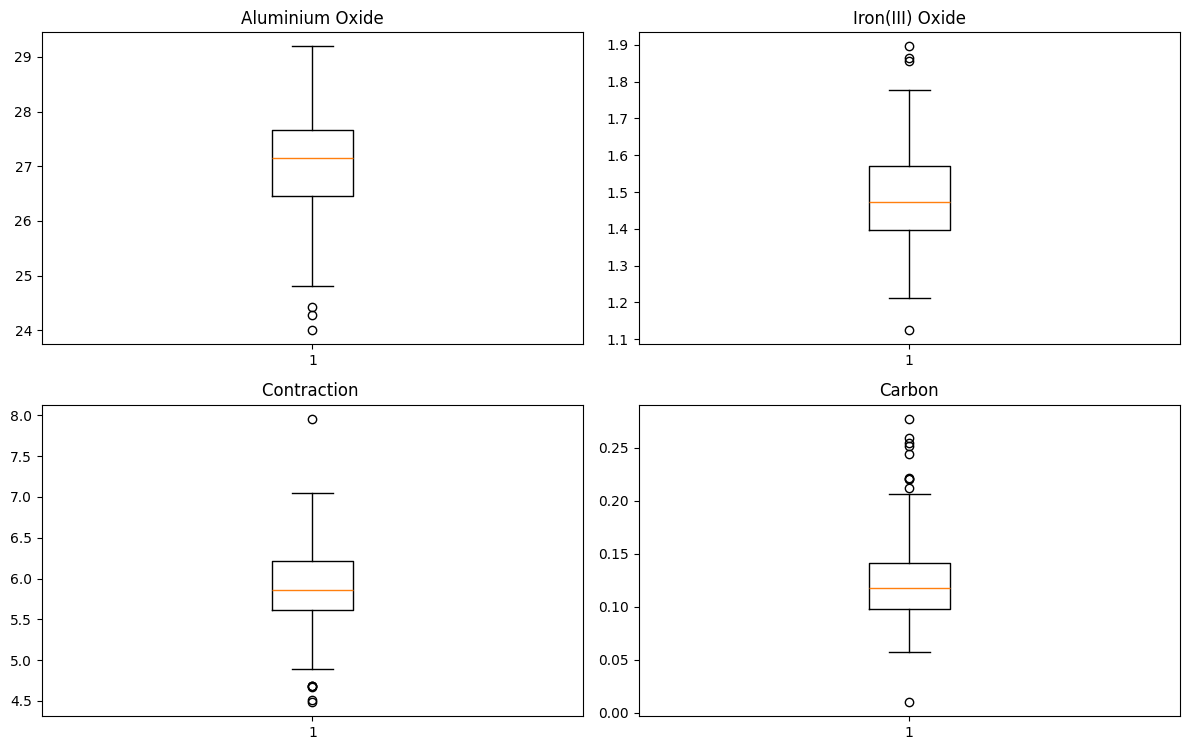

In [169]:

fig, axs = plt.subplots(2, 2, figsize=(12, 8))

for i, col in enumerate(columns):
    row = i // 2
    col_index = i % 2
    axs[row, col_index].plot(data.index, data[col])
    axs[row, col_index].set_title(legend_labels[i])

plt.tight_layout()
plt.show()


fig, axs = plt.subplots(2, 2, figsize=(12, 8))

for i, col in enumerate(columns):
    row = i // 2
    col_index = i % 2
    axs[row, col_index].boxplot(data[col].dropna())
    axs[row, col_index].set_title(legend_labels[i])

plt.tight_layout(rect=[0, 0, 1, 0.95]) 
plt.show()


In [170]:
zero_counts = (data[columns] == 0).sum()
print("\nNumber of zero values in each column:")
print(zero_counts)


Number of zero values in each column:
Al2O3.7      0
Fe2O3.7      0
CS-C.7       0
Carbono.7    0
dtype: int64


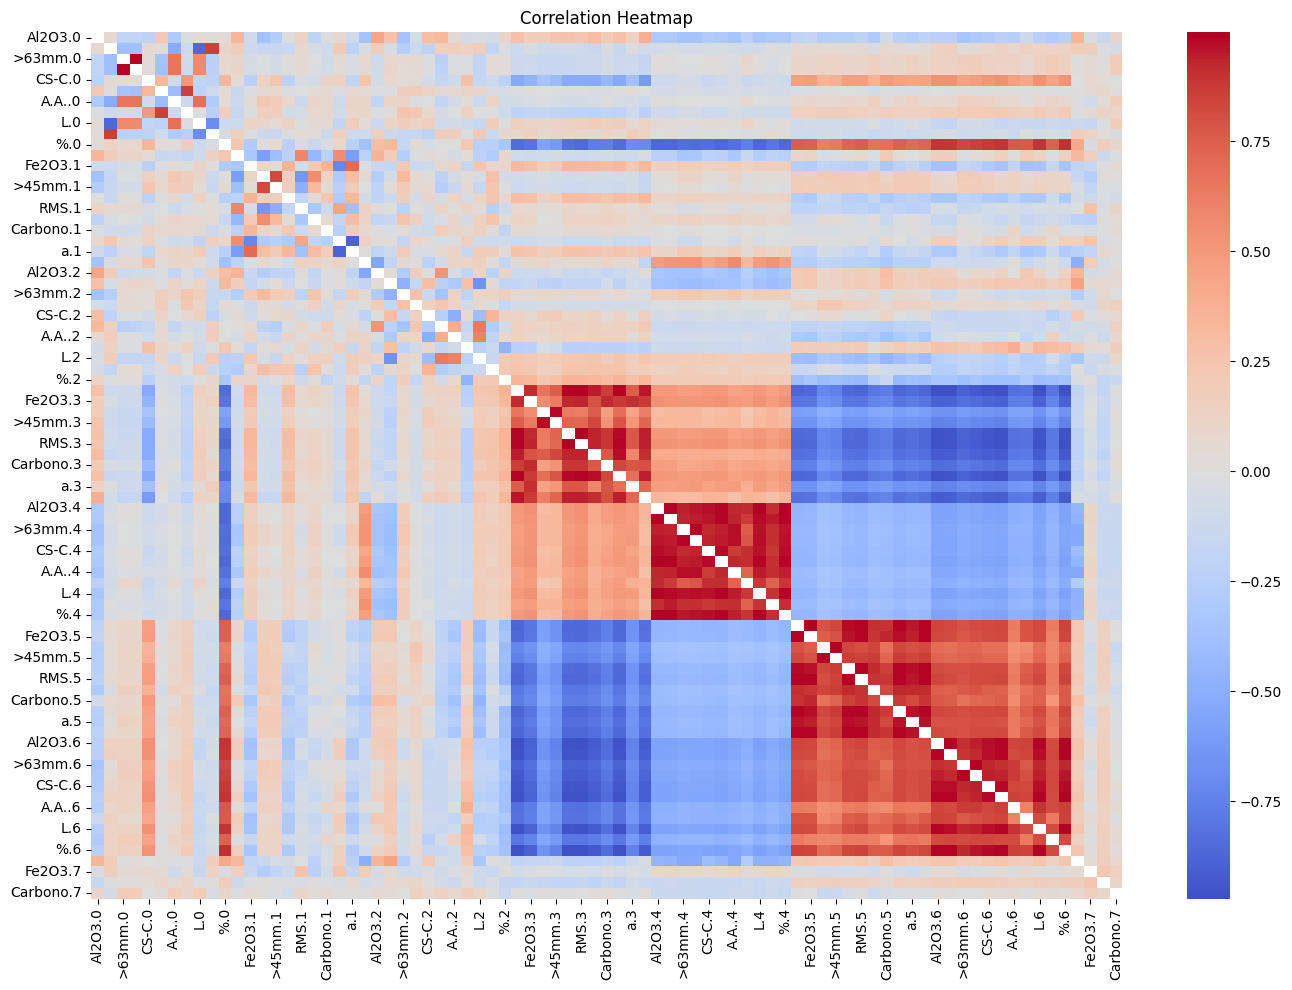

In [171]:
corr_matrix = data.corr()

mask = np.eye(len(corr_matrix), dtype=bool)

plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, fmt=".2f", center=0, mask=mask)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()




In [172]:
target_columns = ["Al2O3.7", "Fe2O3.7", "CS-C.7", "Carbono.7",]
corr_matrix = data.corr()


threshold = 0.1


feature_columns_1 = [col for col in data.columns if col not in target_columns]


selected_features_1 = []

for feature in feature_columns_1:
    for target in target_columns:
        if abs(corr_matrix.loc[feature, target]) >= threshold:
            selected_features_1.append(feature)
            break  

selected_features = list(set(selected_features_1))
print("Selected features with 0.1 correlation:")
print(selected_features)
print(f"Number of selected features: {len(selected_features)}")

threshold = 0.3
feature_columns_3 = [col for col in data.columns if col not in target_columns]
selected_features_3 = []
for feature in feature_columns_3:
    for target in target_columns:
        if abs(corr_matrix.loc[feature, target]) >= threshold:
            selected_features_3.append(feature)
            break
selected_features_3 = list(set(selected_features_3))
print("Selected features with 0.3 correlation:")
print(selected_features_3)
print(f"Number of selected features: {len(selected_features_3)}")


Selected features with 0.1 correlation:
['L.3', 'Carbono.0', 'Fe2O3.5', 'A.A..0', 'a.3', '%.2', '>63mm.4', '%.1', 'L.1', 'a.1', 'Fe2O3.3', 'Fe2O3.1', '>63mm.0', 'L.5', 'RMS.2', 'a.0', 'a.5', '>45mm.6', '>63mm.1', 'Al2O3.2', 'Carbono.3', 'Carbono.4', 'Fe2O3.4', 'RMS.3', '>63mm.5', 'Carbono.5', '>45mm.3', 'a.6', 'CS-C.6', '%.4', 'RMS.1', 'A.A..1', 'a.4', 'L.6', '%.0', 'Carbono.2', 'CS-C.2', '>63mm.6', 'Al2O3.4', '>63mm.3', '>45mm.0', '%.3', 'Al2O3.5', '>45mm.2', 'Al2O3.0', '>45mm.1', 'L.0', 'Fe2O3.2', 'L.2', 'Fe2O3.0', 'A.A..4', '>45mm.5', 'CS-C.5', 'A.A..5', 'A.A..6', '%.6', 'RMS.6', 'a.2', 'L.4', 'Al2O3.3', 'CS-C.1', '>45mm.4', 'Al2O3.6', 'CS-C.3', '%.5', 'RMS.5', 'Fe2O3.6', 'CS-C.4', 'A.A..3', '>63mm.2', 'Carbono.6', 'A.A..2', 'Al2O3.1', 'RMS.4']
Number of selected features: 74
Selected features with 0.3 correlation:
['Al2O3.4', 'L.4', 'Al2O3.2', '>45mm.4', '%.0', 'Fe2O3.4', 'Al2O3.0', 'Fe2O3.2', '>63mm.4', 'L.2', 'CS-C.4', 'A.A..4', '%.4', '%.1', 'a.4', 'Al2O3.1', 'RMS.4']
Number of 

In [173]:
y_targets = data[target_columns]

X = data.drop(columns=target_columns)
y = data[target_columns]

X = X.dropna()
y = y.loc[X.index]  

splits = {}

for col in target_columns:
    X_train, X_test, y_train, y_test = train_test_split(X, y[col], test_size=0.2, random_state=42)
    splits[col] = {
        "X_train": X_train,
        "X_test": X_test,
        "y_train": y_train,
        "y_test": y_test
    }

for col in target_columns:
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(splits[col]["X_train"])
    X_test_scaled = scaler.transform(splits[col]["X_test"])

    splits[col]["X_train_scaled"] = X_train_scaled
    splits[col]["X_test_scaled"] = X_test_scaled


In [174]:
models = {}
results = {}

for target, data_split in splits.items():
    model = LinearRegression()
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    cv_results = cross_validate(model, data_split["X_train_scaled"], data_split["y_train"], cv=kf, scoring=["neg_mean_squared_error", "r2"])
    
    avg_mse = -cv_results["test_neg_mean_squared_error"].mean()
    avg_r2 = cv_results["test_r2"].mean()

    model.fit(data_split["X_train_scaled"], data_split["y_train"])
    y_pred = model.predict(data_split["X_test_scaled"])    
    
    models[target] = model
    
    mse = mean_squared_error(data_split["y_test"], y_pred)
    r2 = r2_score(data_split["y_test"], y_pred)
    
    results[target] = {
        "MSE": avg_mse,
        "R²": avg_r2,
        "Predictions": y_pred
    }
    
    print(f"\n {target}")
    print(f"   MSE: {mse:.4f}")
    print(f"   R² Score: {r2:.4f}")



 Al2O3.7
   MSE: 0.3515
   R² Score: 0.4969

 Fe2O3.7
   MSE: 0.0197
   R² Score: -0.7250

 CS-C.7
   MSE: 0.4260
   R² Score: -1.2923

 Carbono.7
   MSE: 0.0020
   R² Score: -0.0133


In [175]:
# for tager in target_columns:
#     plt.figure(figsize=(10, 6))
#     plt.scatter(splits[tager]["y_test"], results[tager]["Predictions"])
#     plt.plot([splits[tager]["y_test"].min(), splits[tager]["y_test"].max()], [splits[tager]["y_test"].min(), splits[tager]["y_test"].max()], 'k--', lw=2)
#     plt.xlabel("True Values")
#     plt.ylabel("Predictions")
#     plt.title(f"True vs Predicted for {tager}")
#     plt.grid(True)
#     plt.show()



In [176]:
# y_true = data_split["y_test"].values
# y_pred = y_pred  

# plt.figure(figsize=(10, 6))

# plt.plot(y_true, label="Actual", color='blue', linewidth=2)
# plt.plot(y_pred, label="Predicted", color='red', linestyle='--', linewidth=2)

# plt.title("Actual vs Predicted Values for Al2O3.7")
# plt.xlabel("Sample Index")
# plt.ylabel("Value")
# plt.legend()
# plt.grid(True)
# plt.tight_layout()
# plt.show()

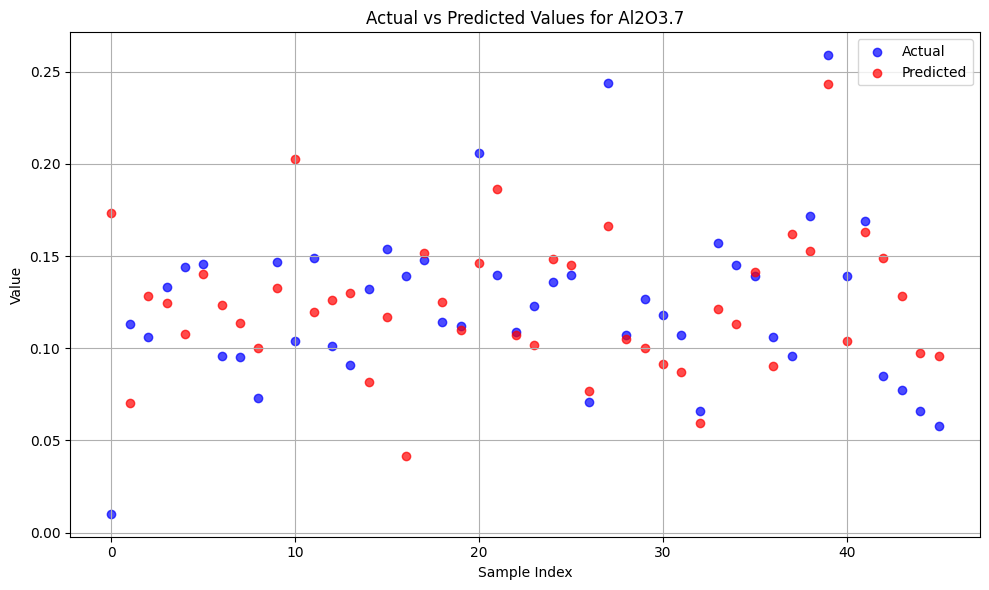

In [177]:

y_true = data_split["y_test"].values
y_pred = y_pred

plt.figure(figsize=(10, 6))

indices = range(len(y_true))

plt.scatter(indices, y_true, color='blue', label='Actual', alpha=0.7)
plt.scatter(indices, y_pred, color='red', label='Predicted', alpha=0.7)

plt.title("Actual vs Predicted Values for Al2O3.7")
plt.xlabel("Sample Index")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [178]:
X_filtered = X[selected_features_3]

splits_1 = {}

for col in target_columns:
    X_train, X_test, y_train, y_test = train_test_split(X_filtered, y[col], test_size=0.2, random_state=42)
    splits_1[col] = {
        "X_train": X_train,
        "X_test": X_test,
        "y_train": y_train,
        "y_test": y_test
    }

for col in target_columns:
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(splits_1[col]["X_train"])
    X_test_scaled = scaler.transform(splits_1[col]["X_test"])

    splits_1[col]["X_train_scaled"] = X_train_scaled
    splits_1[col]["X_test_scaled"] = X_test_scaled

models = {}
results = {}

for target, data_split in splits_1.items():
    model = LinearRegression()
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    cv_results = cross_validate(model, data_split["X_train"], data_split["y_train"], cv=kf, scoring=["neg_mean_squared_error", "r2"])
    
    avg_mse = -cv_results["test_neg_mean_squared_error"].mean()
    avg_r2 = cv_results["test_r2"].mean()

    model.fit(data_split["X_train_scaled"], data_split["y_train"])
    y_pred = model.predict(data_split["X_test_scaled"])    
    
    models[target] = model
    
    mse = mean_squared_error(data_split["y_test"], y_pred)
    r2 = r2_score(data_split["y_test"], y_pred)
    
    results[target] = {
        "MSE": avg_mse,
        "R²": avg_r2,
        "Predictions": y_pred
    }

    print(f"\n {target}")
    print(f"   MSE: {mse:.4f}")
    print(f"   R² Score: {r2:.4f}")


 Al2O3.7
   MSE: 0.4732
   R² Score: 0.3228

 Fe2O3.7
   MSE: 0.0131
   R² Score: -0.1430

 CS-C.7
   MSE: 0.1720
   R² Score: 0.0746

 Carbono.7
   MSE: 0.0019
   R² Score: 0.0235


In [179]:

svr_results = {}
svr_models = {}

for col in target_columns:
    svr = SVR(kernel='rbf', C=1.0, epsilon=0.1)

    svr.fit(splits_1[col]["X_train_scaled"], splits_1[col]["y_train"])

    y_pred = svr.predict(splits_1[col]["X_test_scaled"])

    mse = mean_squared_error(splits_1[col]["y_test"], y_pred)
    r2 = r2_score(splits_1[col]["y_test"], y_pred)

    svr_results[col] = {
        "MSE": mse,
        "R2": r2
    }
    

    svr_models[col] = svr

    print(f"\n {col}")
    print(f"   MSE: {mse:.4f}")
    print(f"   R² Score: {r2:.4f}\n")



 Al2O3.7
   MSE: 0.4522
   R² Score: 0.3528


 Fe2O3.7
   MSE: 0.0119
   R² Score: -0.0381


 CS-C.7
   MSE: 0.1890
   R² Score: -0.0172


 Carbono.7
   MSE: 0.0036
   R² Score: -0.8530

